# Final Project: Analyzing U.S. Crime Data

## I) **Data Preparation:**

### I.a) Data Collection:

#### Downloading datasets (First Timeonly Usage):

In [209]:
!pip install wget
!pip install openpyxl
!pip install gdown
!pip install basemap
!pip install plotly
!pip install statsmodels

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [210]:
import  numpy as np
import matplotlib.pyplot as plt
import wget
import gdown
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy import stats

In [211]:
url1 = 'https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=1000000'
url2 = 'https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=1000000'
url3 = "https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=1000000"
url4 = "https://www.statefirearmlaws.org/sites/default/files/2020-07/DATABASE_0.xlsx"
url5= "https://www.statefirearmlaws.org/sites/default/files/2020-07/codebook_0.xlsx"

wget.download(url1)
wget.download(url2)
wget.download(url3)
wget.download(url4)
wget.download(url5)

url6 = "https://docs.google.com/uc?export=download&id=1tS2kWpxKTwXlLbAgCdl_Ps9MbS3TWRpR"
out = "population_states_1991_2021.csv"
gdown.download(url6,out)

Downloading...
From: https://docs.google.com/uc?export=download&id=1tS2kWpxKTwXlLbAgCdl_Ps9MbS3TWRpR
To: /data/notebook_files/population_states_1991_2021.csv
100%|██████████| 13.4k/13.4k [00:00<00:00, 12.4MB/s]


'population_states_1991_2021.csv'

In [212]:
url7 = "https://docs.google.com/uc?export=download&id=1hVSLGoU1rzCUYQaTdfILptaqc8593Xqq"
out = "offensecountperstate.csv"
gdown.download(url7,out)

Downloading...
From: https://docs.google.com/uc?export=download&id=1hVSLGoU1rzCUYQaTdfILptaqc8593Xqq
To: /data/notebook_files/offensecountperstate.csv
100%|██████████| 1.85M/1.85M [00:00<00:00, 40.2MB/s]


'offensecountperstate.csv'

In [213]:
!mv gcuy-rt5g.csv personal_victimization.csv
!mv r4j4-fdwx.csv personal_population.csv
!mv ynf5-u8nk.csv georgia_recidivism.csv
!mv DATABASE_0.xlsx firearm_laws.xlsx
!mv codebook_0.xlsx firearm_book.xlsx

In [214]:
#FBI DATASET : 
import requests
import json
import os
import uuid
from concurrent.futures import ThreadPoolExecutor, as_completed

In [215]:
# agencies_url='https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY=p5wu8yPGwFipJn2ADol4Yv7miyA98arq4OuANvsh'
# agencies_response = requests.get(agencies_url)
# agencies_data= agencies_response.json()

# # import pprint
# # pp = pprint.PrettyPrinter(indent=1)
# # pp.pprint(agencies_data)


# base_api_url = 'https://api.usa.gov/crime/fbi/cde'
# query = '/nibrs/state/{state}/{offense}/{category}/{type}'
# CLIENT_API_key = 'p5wu8yPGwFipJn2ADol4Yv7miyA98arq4OuANvsh' 
# response = requests.get(base_api_url+ query + CLIENT_API_key)



# data = response.json()
# df = pd.DataFrame(data['results'])
# # A Client ID is needed (https://api.data.gov/signup/)



# url_list = ['url1', 'url2']

# def download_file(url, file_name):
#     try:
#         html = requests.get(url, stream=True)
#         open(f'{file_name}.json', 'wb').write(html.content)
#         return html.status_code
#     except requests.exceptions.RequestException as e:
#        return e
 
# def runner():
#     threads= []
#     with ThreadPoolExecutor(max_workers=20) as executor:
#         for url in url_list:
#             file_name = uuid.uuid1()
#             threads.append(executor.submit(download_file, url, file_name))
            
#         for task in as_completed(threads):
#             print(task.result()) 
       
# runner()


#### Datasets Reading:

In [216]:
pers_popdf = pd.read_csv('personal_population.csv')
pers_vectimdf = pd.read_csv('personal_victimization.csv')
georgia_reciddf = pd.read_csv('georgia_recidivism.csv')
fire_lawsdf = pd.read_excel('firearm_laws.xlsx')
fire_bookdf = pd.read_excel('firearm_book.xlsx')
states_popdf = pd.read_csv('population_states_1991_2021.csv')
offensecountdf = pd.read_csv('offensecountperstate.csv')

In [217]:
pers_popdf.shape,pers_vectimdf.shape,georgia_reciddf.shape,fire_lawsdf.shape, fire_bookdf.shape,states_popdf.shape,offensecountdf.shape

((1000000, 20),
 (63465, 37),
 (25835, 54),
 (1500, 137),
 (134, 10),
 (51, 32),
 (40533, 5))

In [218]:
pers_popdf.isna().sum().sum(),pers_vectimdf.isna().sum().sum(),georgia_reciddf.isna().sum().sum(),fire_lawsdf.isna().sum().sum(),offensecountdf.isna().sum().sum()

(0, 0, 36700, 0, 0)

### I.b) Data Cleaning: 

In [219]:
georgia_reciddf.describe()

,id,residence_puma,supervision_risk_score_first,avg_days_per_drugtest,drugtests_thc_positive,drugtests_cocaine_positive,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,training_sample
count,25835.000000,25835.000000,25360.000000,19732.000000,20663.000000,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835.000000
mean,13314.004838,12.361796,6.082216,93.890044,0.063350,0.013741,0.012890,0.00755,0.482331,0.769295,0.697813
std,7722.206327,7.133742,2.381442,117.169847,0.138453,0.061233,0.060581,0.04115,0.425004,0.813787,0.459215
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6626.500000,6.000000,4.000000,28.837366,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,13270.000000,12.000000,6.000000,55.424812,0.000000,0.000000,0.000000,0.00000,0.475728,0.635217,1.000000
75%,20021.500000,18.000000,8.000000,110.333333,0.071429,0.000000,0.000000,0.00000,0.969325,1.000000,1.000000
max,26761.000000,25.000000,10.000000,1088.500000,1.000000,1.000000,1.000000,1.00000,1.000000,8.000000,1.000000


In [220]:
georgia_reciddf.isna().sum()


id 0
gender 0
race 0
age_at_release 0
residence_puma 0
gang_affiliated 3167
supervision_risk_score_first 475
supervision_level_first 1720
education_level 0
dependents 0
prison_offense 3277
prison_years 0
prior_arrest_episodes_felony 0
prior_arrest_episodes_misd 0
prior_arrest_episodes_violent 0
prior_arrest_episodes_property 0
prior_arrest_episodes_drug 0
prior_arrest_episodes 0
prior_arrest_episodes_1 0
prior_arrest_episodes_2 0
prior_conviction_episodes 0
prior_conviction_episodes_1 0
prior_conviction_episodes_2 0
prior_conviction_episodes_3 0
prior_conviction_episodes_4 0
prior_conviction_episodes_5 0
prior_conviction_episodes_6 0
prior_conviction_episodes_7 0
prior_revocations_parole 0
prior_revocations_probation 0
condition_mh_sa 0
condition_cog_ed 0
condition_other 0
violations 0
violations_instruction 0
violations_failtoreport 0
violations_1 0
delinquency_reports 0
program_attendances 0
program_unexcusedabsences 0
residence_changes 0
avg_days_per_drugtest 6103
drugtests_thc_positive 5172
drugtests_cocaine_positive 5172
drugtests_meth_positive 5172
drugtests_other_positive 5172
percent_days_employed 462
jobs_per_year 808
employment_exempt 0
recidivism_within_3years 0
recidivism_arrest_year1 0
recidivism_arrest_year2 0
recidivism_arrest_year3 0
training_sample 0
dtype: int64

In [221]:
georgia_reciddf['drugtests_thc_positive']
# georgia_reciddf2 = georgia_reciddf.dropna()

# georgia_reciddf.shape,georgia_reciddf2.shape

0 0.000000
1 0.000000
2 0.333333
3 0.000000
4 0.000000
 ... 
25830 0.000000
25831 0.000000
25832 NaN
25833 0.000000
25834 0.100000
Name: drugtests_thc_positive, Length: 25835, dtype: float64

In [222]:
georgia_reciddf.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [223]:
pers_vectimdf2 = pers_vectimdf
pers_vectimdf2.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,0,1,0,3,1,-1,1952.97373,1,1952.97373
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,2,0,1,0,5,1,-1,5570.68773,1,5570.68773
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,0,1,0,4,1,-1,3366.95748,1,3366.95748
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,0,1,0,88,1,-1,6991.56061,1,6991.56061
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,0,1,3,1,3,3,-1,2834.64905,1,2834.64905


In [224]:
pers_popdf2 = pers_popdf
pers_popdf2.describe()

,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.0,1000000.0,1000000.000000
mean,2000.102648,1999.850988,3.810819,1.524712,2.588407,1.254435,1.799987,21.028178,-1.0,2.605085,0.837952,1.821643,1.862583,-1.0,6.344795,2.009873,-2.0,-1.0,1321.724049
std,4.420925,4.419436,1.510914,0.499389,7.741544,0.693522,1.630760,33.195984,0.0,7.284477,1.603900,1.749042,0.667921,0.0,13.008547,10.296445,0.0,0.0,733.056981
min,1993.100000,1993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,-1.000000,-1.000000,1.000000,-1.0,1.000000,-1.000000,-2.0,-1.0,0.000000
25%,1996.200000,1996.000000,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,-1.0,1.000000,0.000000,1.000000,1.000000,-1.0,4.000000,-1.000000,-2.0,-1.0,1065.904819
50%,2000.200000,2000.000000,4.000000,2.000000,2.000000,1.000000,1.000000,6.000000,-1.0,2.000000,1.000000,2.000000,2.000000,-1.0,4.000000,-1.000000,-2.0,-1.0,1249.195543
75%,2004.100000,2004.000000,5.000000,2.000000,2.000000,1.000000,2.000000,7.000000,-1.0,2.000000,1.000000,3.000000,2.000000,-1.0,5.000000,4.000000,-2.0,-1.0,1586.464430
max,2008.200000,2008.000000,6.000000,2.000000,88.000000,5.000000,6.000000,88.000000,-1.0,88.000000,5.000000,4.000000,3.000000,-1.0,88.000000,98.000000,-2.0,-1.0,18986.223565


In [225]:
pers_popdf2.columns

Index(['idper', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize',
       'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran',
       'citizen', 'wgtpercy'],
      dtype='object')

In [226]:
pers_popdf2.rename(columns={'hincome1': 'Annual household income',
                               'hincome2': 'Annual household income- imputed',
                               'ager': 'Age'},
                               inplace=True, errors='raise')

In [227]:
pers_popdf2.columns

Index(['idper', 'yearq', 'year', 'Age', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'Annual household income',
       'Annual household income- imputed', 'marital', 'popsize', 'region',
       'msa', 'locality', 'educatn1', 'educatn2', 'veteran', 'citizen',
       'wgtpercy'],
      dtype='object')

In [228]:
pers_vectimdf2.columns

Index(['idper', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize',
       'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran',
       'citizen', 'newcrime', 'newoff', 'seriousviolent', 'notify',
       'vicservices', 'locationr', 'direl', 'weapon', 'weapcat', 'injury',
       'serious', 'treatment', 'offenderage', 'offendersex', 'offtracenew',
       'wgtviccy', 'series', 'newwgt'],
      dtype='object')

In [229]:
pers_vectimdf2.rename(columns={'hincome1': 'Annual household income',
                               'hincome2': 'Annual household income- imputed',
                               'ager': 'Age',
                               'newoff': 'Type of crime'},
                               inplace=True, errors='raise')

In [230]:
pers_vectimdf2.columns

Index(['idper', 'yearq', 'year', 'Age', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'Annual household income',
       'Annual household income- imputed', 'marital', 'popsize', 'region',
       'msa', 'locality', 'educatn1', 'educatn2', 'veteran', 'citizen',
       'newcrime', 'Type of crime', 'seriousviolent', 'notify', 'vicservices',
       'locationr', 'direl', 'weapon', 'weapcat', 'injury', 'serious',
       'treatment', 'offenderage', 'offendersex', 'offtracenew', 'wgtviccy',
       'series', 'newwgt'],
      dtype='object')

In [231]:
offensecountdf2 = offensecountdf.drop('Unnamed: 0', axis=1)

In [232]:
offensecountdf2['offenseName'].value_counts()


theft-from-motor-vehicle 1766
sex-offenses-non-forcible 1572
simple-assault 896
aggravated-assault 893
all-other-larceny 893
drug-violations 893
rape 890
burglary-breaking-and-entering 890
destruction-damage-vandalism-of-property 889
fondling 889
counterfeiting-forgery 885
motor-vehicle-theft 884
stolen-property-offenses 884
weapon-law-violation 883
intimidation 882
drug-equipment-violations 880
robbery 880
false-pretenses-swindle-confidence-game 879
kidnapping-abduction 872
theft-from-building 871
shoplifting 868
impersonation 866
credit-card-automated-teller-machine-fraud 863
theft-of-motor-vehicle-parts-or-accessories 861
arson 859
sodomy 858
embezzlement 853
purse-snatching 852
pocket-picking 848
theft-from-coin-operated-machine-or-device 846
murder-and-nonnegligent-manslaughter 841
pornography-obscence-material 834
statutory-rape 816
prostitution 811
extortion-blackmail 806
assisting-or-promoting-prostitution 773
incest 756
sexual-assult-with-an-object 750
wire-fraud 743
negligent-manslaughter 721
bribery 669
welfare-fraud 666
operating-promoting-assiting-gambling 587
justifiable-homicide 486
betting 481
gambling-equipment-violation 446
identity-theft 418
animal-cruelty 236
human-trafficking-commerical-sex-acts 229
hacking-computer-invasion 222
purchasing-prostitution 197
human-trafficking-commerical-involuntary-servitude 147
sports-tampering 53
Name: offenseName, dtype: int64

In [233]:
import pprint
s = "aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-non-forcible,shoplifting,simple-assault,sodomy,sports-tampering,statutory-rape,stolen-property-offenses,theft-from-building,theft-from-coin-operated-machine-or-device,theft-from-motor-vehicle,theft-of-motor-vehicle-parts-or-accessories,theft-from-motor-vehicle,weapon-law-violation,welfare-fraud,wire-fraud,not-specified,liquor-law-violations,crime-against-person,crime-against-property,crime-against-society,assault-offenses,homicide-offenses,human-trafficking-offenses,sex-offenses,sex-offenses-non-forcible,fraud-offenses,larceny-theft-offenses,drugs-narcotic-offenses,gambling-offenses,prostitution-offenses,all-offenses"
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(s)

'aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-no

s = "aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-non-forcible,shoplifting,simple-assault,sodomy,sports-tampering,statutory-rape,stolen-property-offenses,theft-from-building,theft-from-coin-operated-machine-or-device,theft-from-motor-vehicle,theft-of-motor-vehicle-parts-or-accessories,theft-from-motor-vehicle,weapon-law-violation,welfare-fraud,wire-fraud,not-specified,liquor-law-violations,crime-against-person,crime-against-property,crime-against-society,assault-offenses,homicide-offenses,human-trafficking-offenses,sex-offenses,sex-offenses-non-forcible,fraud-offenses,larceny-theft-offenses,drugs-narcotic-offenses,gambling-offenses,prostitution-offenses,all-offenses"

In [234]:
offensecountdf2['offenseCategory']=np.where( (offensecountdf2['offenseName']), '','')

In [235]:
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'aggravated-assault', 'Assault-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'simple-assault', 'Assault-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'arson', 'Arson',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'intimidation', 'Assault-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'animal-cruelty', 'Animal-Cruelty',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'assisting-or-promoting-prostitution', 'Prostitution-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'burglary-breaking-and-entering', 'Burglary-Breaking-Entering',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'betting', 'Gambling-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'operating-promoting-assiting-gambling', 'Gambling-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'gambling-equipment-violation', 'Gambling-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'sports-tampering', 'Gambling-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'counterfeiting-forgery', 'Counterfeiting-Forgery',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'drug-equipment-violations', 'Drugs-Narcotic-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'drug-violations', 'Drugs-Narcotic-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'pocket-picking', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'purse-snatching', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'shoplifting', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'theft-from-building', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'theft-from-coin-operated-machine-or-device', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'theft-from-motor-vehicle', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'theft-of-motor-vehicle-parts-or-accessories', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'all-other-larceny', 'Larceny-Theft-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'bribery', 'Bribery',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'destruction-damage-vandalism-of-property', 'Destruction-Damage-Vandalism-of-Property',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'weapon-law-violation', 'Weapon-Law-Violations',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'pornography-obscence-material', 'Pornography-Obscene-Material',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'motor-vehicle-theft', 'Motor-Vehicle-Theft',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'stolen-property-offenses', 'Stolen-Property-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'robbery', 'Robbery-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'kidnapping-abduction', 'Kidnapping-Abduction',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'extortion-blackmail', 'Extortion-Blackmail',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'embezzlement', 'Embezzlement',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'sex-offenses-non-forcible', 'Sex-Offenses-Non-Forcible',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'larceny-theft-offenses', 'Larceny-Theft Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'gambling-offenses', 'Gambling-Offenses,',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'drugs-narcotic-offenses', 'Drugs-Narcotic-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'assault-offenses', 'Assault-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'prostitution-offenses', 'Prostitution-Offenses,',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'fraud-offenses', 'Fraud-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'sex-offenses', 'Sex-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where( offensecountdf2['offenseName'] == 'false-pretenses-swindle-confidence-game', 'Fraud-Offenses',offensecountdf2['offenseCategory'])
offensecountdf2['offenseCategory']=np.where(offensecountdf2['offenseName'] == '', None,offensecountdf2['offenseCategory'])

In [236]:
offensecountdf2['offenseCategory']=\
    np.where(np.logical_or(offensecountdf2['offenseName'] == 'murder-and-nonnegligent-manslaughter',\
                           np.logical_or(offensecountdf2['offenseName'] == 'negligent-manslaughter',\
                                         (offensecountdf2['offenseName'] == 'justifiable-homicide')))\
                                                , 'Homicide-Offenses',offensecountdf2['offenseCategory'])

In [237]:
offensecountdf2['offenseCategory']=\
    np.where(np.logical_or(offensecountdf2['offenseName'] == 'identity-theft',\
                           np.logical_or(offensecountdf2['offenseName'] == 'hacking-computer-invasion',\
                                         np.logical_or((offensecountdf2['offenseName'] == 'impersonation'),\
                                                       np.logical_or((offensecountdf2['offenseName'] == 'wire-fraud'),\
                                                                     np.logical_or( (offensecountdf2['offenseName'] == 'welfare-fraud'),\
                                                                                   (offensecountdf2['offenseName'] == 'credit-card-automated-teller-machine-fraud'))))))  , 'Fraud-Offenses',offensecountdf2['offenseCategory'])

In [238]:
offensecountdf2['offenseCategory']=\
    np.where(np.logical_or(offensecountdf2['offenseName'] == 'murder-and-nonnegligent-manslaughter',\
                           np.logical_or(offensecountdf2['offenseName'] == 'negligent-manslaughter',\
                                         (offensecountdf2['offenseName'] == 'justifiable-homicide')))\
                                                , 'Homicide-Offenses',offensecountdf2['offenseCategory'])

In [239]:
offensecountdf2['offenseCategory']=\
    np.where(np.logical_or(offensecountdf2['offenseName'] == 'human-trafficking-commerical-sex-acts',\
                           (offensecountdf2['offenseName'] == 'human-trafficking-commerical-involuntary-servitude'))\
                                        , 'Human-Trafficking',offensecountdf2['offenseCategory'])
                            
                            

In [240]:
offensecountdf2['offenseCategory']=\
    np.where(np.logical_or(offensecountdf2['offenseName'] == 'statutory-rape',\
                           np.logical_or(offensecountdf2['offenseName'] == 'incest',\
                                         np.logical_or((offensecountdf2['offenseName'] == 'fondling'),\
                                                       np.logical_or((offensecountdf2['offenseName'] == 'sexual-assult-with-an-object'),\
                                                                     np.logical_or( (offensecountdf2['offenseName'] == 'sodomy'),\
                                                                                   (offensecountdf2['offenseName'] == 'rape'))))))  , 'Sex-Offenses',offensecountdf2['offenseCategory'])

In [241]:
offensecountdf2.isna().sum()

stateName 0
offenseName 0
offenseCount 0
Year 0
offenseCategory 0
dtype: int64

In [242]:
offensecountdf2.sample(100)

,stateName,offenseName,offenseCount,Year,offenseCategory
4504,Maine,rape,122,2014,Sex-Offenses
38599,Louisiana,theft-from-motor-vehicle,1877,2016,Larceny-Theft-Offenses
19526,Rhode Island,statutory-rape,26,2021,Sex-Offenses
28656,Ohio,counterfeiting-forgery,5590,2008,Counterfeiting-Forgery
15258,Virginia,simple-assault,77130,2018,Assault-Offenses
...,...,...,...,...,...
31317,West Virginia,operating-promoting-assiting-gambling,3,2019,Gambling-Offenses
3858,Maryland,motor-vehicle-theft,23,2016,Motor-Vehicle-Theft
18617,North Dakota,theft-from-building,1443,1996,Larceny-Theft-Offenses
10692,Minnesota,simple-assault,1,2006,Assault-Offenses


#Q1

## II) **Exploratory Data Analysis (EDA):**

### Q1

In [243]:
offensecountdf5 = offensecountdf2.drop(['offenseName', 'stateName', 'Year'], axis = 1)
offensecountdf6 = offensecountdf2.drop(['offenseName', 'stateName'], axis = 1)
states_popdf2 = states_popdf.drop(['state'], axis=1)

In [244]:
get_value = lambda x, y: offensecountdf6.loc[np.logical_and(offensecountdf6['offenseCategory'] == x, offensecountdf6['Year'] == y), 'offenseCount'].sum()
get_value2 = lambda x: offensecountdf5.loc[offensecountdf5['offenseCategory'] == x, 'offenseCount'].sum()

offenses_types = list(offensecountdf5['offenseCategory'].unique())

In [245]:
years = [i for i in range(1991, 2022)]
years.reverse()

In [246]:
offenses_counts = {offense: get_value2(offense) for offense in offenses_types}
sorted_offenses_counts = {k: v for k, v in sorted(offenses_counts.items(), key = lambda item: item[1], reverse = True)}
top_five_crimes_keys = list(sorted_offenses_counts.keys())[:5]

In [247]:
final = {}
for year in years:
    final[str(year)] = {offense: (get_value(offense, year) / states_popdf2[str(year)].sum()) * 100000 for offense in top_five_crimes_keys}
print(final)

{'2021': {'Larceny-Theft-Offenses': 1122.2410955650882, 'Assault-Offenses': 818.5794522882617, 'Destruction-Damage-Vandalism-of-Property': 387.9422313306929, 'Drugs-Narcotic-Offenses': 391.81696539656093, 'Burglary-Breaking-Entering': 176.72613866223963}, '2020': {'Larceny-Theft-Offenses': 944.0394188584316, 'Assault-Offenses': 626.3093897243723, 'Destruction-Damage-Vandalism-of-Property': 308.5751115236591, 'Drugs-Narcotic-Offenses': 315.7614972543002, 'Burglary-Breaking-Entering': 158.5584747584332}, '2019': {'Larceny-Theft-Offenses': 863.8486906493116, 'Assault-Offenses': 547.1316228038445, 'Destruction-Damage-Vandalism-of-Property': 257.9517927808432, 'Drugs-Narcotic-Offenses': 328.4281528831456, 'Burglary-Breaking-Entering': 150.50012814395888}, '2018': {'Larceny-Theft-Offenses': 724.3556619891912, 'Assault-Offenses': 454.3205183920378, 'Destruction-Damage-Vandalism-of-Property': 223.5359888273035, 'Drugs-Narcotic-Offenses': 294.8168246392766, 'Burglary-Breaking-Entering': 132.976

In [248]:
df = pd.DataFrame(final)
df2 = df.T.sort_index()
df2.head()

,Larceny-Theft-Offenses,Assault-Offenses,Destruction-Damage-Vandalism-of-Property,Drugs-Narcotic-Offenses,Burglary-Breaking-Entering
1991,103.966725,50.330669,35.348117,7.401743,36.650587
1992,138.365426,60.533875,51.375709,9.897697,41.681509
1993,158.705464,77.626999,65.357003,13.079095,41.926974
1994,159.988479,79.704074,63.259850,18.831675,39.955030
1995,150.225858,72.978133,56.312868,21.247312,35.719383


Text(0, 0.5, 'Offense Type Percentage % per 100,000 Population')

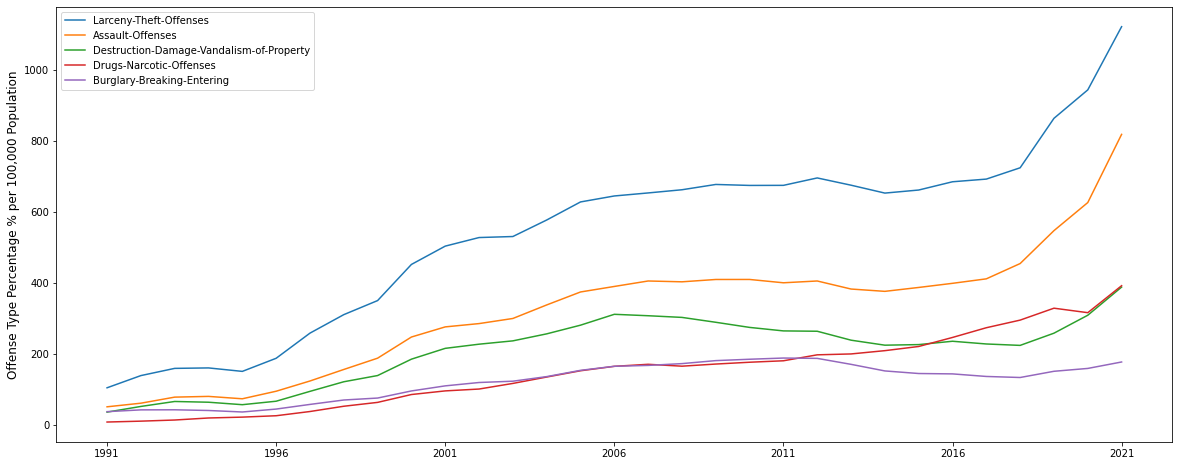

In [249]:
df2.plot(kind = 'line', figsize=(20, 8))
plt.ylabel("Offense Type Percentage % per 100,000 Population", fontsize = 12)

### Q2

In [250]:
offensecountdf2.sort_values(by = 'Year', ascending = True, inplace = True)
offensecountdf3 = offensecountdf2.drop(['offenseName', 'Year'], axis = 1)

In [251]:
# offensecountdf3.sort_values('stateName');

In [252]:
offenses_types = list(offensecountdf3['offenseCategory'].unique())
states = list(offensecountdf3['stateName'].unique())
all_violent_crime = ['Assault-Offenses','Homicide-Offenses', 'Robbery-Offenses','Kidnapping-Abduction', 'Sex-Offenses']

In [253]:
# To sum offenseCategory
get_value = lambda x, y: offensecountdf3.loc[np.logical_and(offensecountdf3['offenseCategory'] == x, offensecountdf3['stateName'] == y), 'offenseCount'].sum()
total_crimes_per_state = lambda x: sum(list(states_count[x].values()))

In [254]:
states_count = {}
for state in states:
    offenses_counts = {offense: get_value(offense, state) for offense in offenses_types}
    states_count[state] = offenses_counts
states_count

{'Illinois': {'Homicide-Offenses': 1296,
  'Assault-Offenses': 314721,
  'Sex-Offenses-Non-Forcible': 204,
  'Gambling-Offenses': 160,
  'Fraud-Offenses': 38164,
  'Motor-Vehicle-Theft': 43943,
  'Destruction-Damage-Vandalism-of-Property': 278732,
  'Robbery-Offenses': 21018,
  'Sex-Offenses': 14331,
  'Larceny-Theft-Offenses': 439375,
  'Kidnapping-Abduction': 3629,
  'Pornography-Obscene-Material': 961,
  'Counterfeiting-Forgery': 12768,
  '': 1910,
  'Weapon-Law-Violations': 20680,
  'Burglary-Breaking-Entering': 105835,
  'Extortion-Blackmail': 384,
  'Stolen-Property-Offenses': 2681,
  'Prostitution-Offenses': 662,
  'Arson': 3829,
  'Drugs-Narcotic-Offenses': 49964,
  'Embezzlement': 147,
  'Bribery': 52,
  'Animal-Cruelty': 94,
  'Human-Trafficking': 17},
 'South Carolina': {'Homicide-Offenses': 11512,
  'Assault-Offenses': 3145967,
  'Sex-Offenses-Non-Forcible': 11950,
  'Gambling-Offenses': 5422,
  'Fraud-Offenses': 445564,
  'Motor-Vehicle-Theft': 464141,
  'Destruction-Damag

In [255]:
final = {}
for state in states:
    violent_crimes = sum([states_count[state].get(key) for key in all_violent_crime])  
    percentage = (violent_crimes / total_crimes_per_state(state)) * 100
    final[state] = round(percentage, 2)

final = {k: v for k, v in sorted(final.items(), key = lambda item: item[1], reverse = False)}

In [256]:
df = pd.DataFrame(final, index = ['0'])
df

,Vermont,Oregon,Colorado,Utah,Washington,Iowa,North Dakota,Minnesota,Kentucky,Montana,...,Michigan,Florida,Louisiana,Tennessee,Georgia,New York,Wyoming,Nevada,District of Columbia,Alaska
0,14.56,15.36,15.61,16.78,17.06,18.33,18.4,18.54,19.43,19.52,...,26.58,26.85,27.13,27.28,27.32,27.43,27.93,30.36,30.6,42.53


Text(0, 0.5, 'Violent Crimes Percentage %')

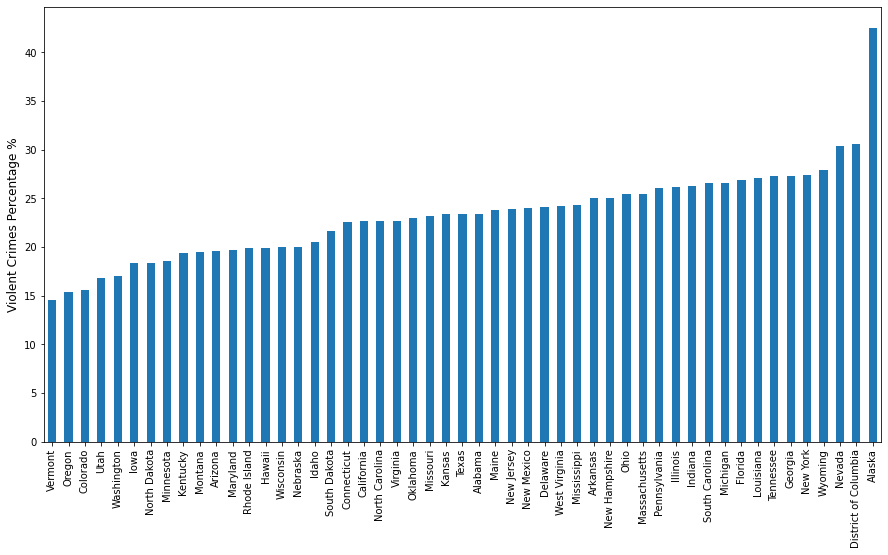

In [257]:
df.T['0'].plot(kind = 'bar', figsize=(15, 8))
plt.ylabel("Violent Crimes Percentage %", fontsize = 12)

#Q3

In [258]:
offensecountdf4 = offensecountdf2.drop(['offenseName', 'stateName'], axis = 1)
get_value = lambda x, y: offensecountdf4.loc[np.logical_and(offensecountdf4['offenseCategory'] == x, offensecountdf4['Year'] == y), 'offenseCount'].sum()
offensecountdf8 = offensecountdf2.drop(['offenseName', 'stateName', 'offenseCategory'], axis = 1)

In [259]:
offensecountdf8.head()

,offenseCount,Year
11946,2,1991
26220,43133,1991
16029,36,1991
25871,88,1991
25308,878,1991


In [260]:
years

[2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991]

In [261]:
di_homicide_rate = {}
di_total_crimes_rate = {}
for year in years:
    homicide_rate = (get_value('Homicide-Offenses', year) / states_popdf2[str(year)].sum()) * 100000
    total_crimes_rate = (offensecountdf4.loc[offensecountdf8['Year'] == year, 'offenseCount'].sum() / states_popdf2[str(year)].sum()) * 100000
    di_homicide_rate[str(year)] = homicide_rate
    di_total_crimes_rate[str(year)] = total_crimes_rate

In [262]:
di_total_crimes_rate

{'2021': 3584.4812320882997,
 '2020': 2903.2257800173275,
 '2019': 2609.4344794670624,
 '2018': 2215.946306814645,
 '2017': 2097.0808852481427,
 '2016': 2049.771574738869,
 '2015': 1952.7569510304072,
 '2014': 1901.3520520851257,
 '2013': 1944.574457579087,
 '2012': 2030.0495292971818,
 '2011': 1975.030890678059,
 '2010': 1984.0011259535668,
 '2009': 1998.101655646147,
 '2008': 1987.0062137306597,
 '2007': 1993.3499121158452,
 '2006': 1964.027658805664,
 '2005': 1866.5702768188664,
 '2004': 1673.9068703599755,
 '2003': 1505.3680038456582,
 '2002': 1448.155481985196,
 '2001': 1376.4004573761376,
 '2000': 1208.9827939554996,
 '1999': 918.6175661992864,
 '1998': 797.8873499014537,
 '1997': 638.5408527897389,
 '1996': 464.7132750596891,
 '1995': 373.7952557044311,
 '1994': 399.37623605552574,
 '1993': 392.5102116975182,
 '1992': 337.7266907428884,
 '1991': 263.3981031796383}

Text(0, 0.5, 'homicide Offenses Percentage per 100,000 Population')

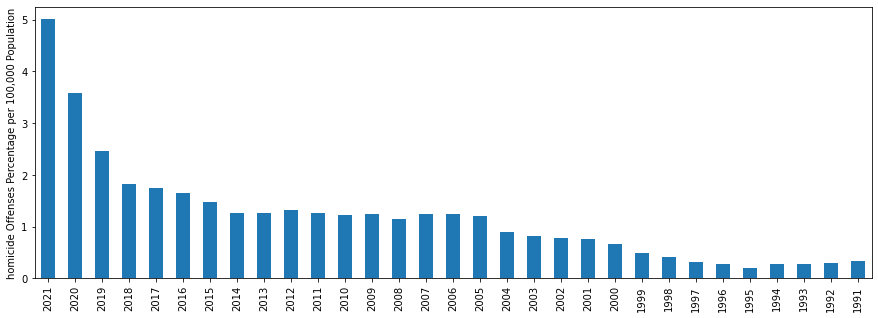

In [263]:
dd = pd.DataFrame(di_homicide_rate, index = ['0'])
dd.T['0'].plot(kind = 'bar', figsize = (15, 5))
plt.ylabel("homicide Offenses Percentage per 100,000 Population", fontsize = 10)

Text(0, 0.5, 'Total Offenses Rate per 100,000 Population')

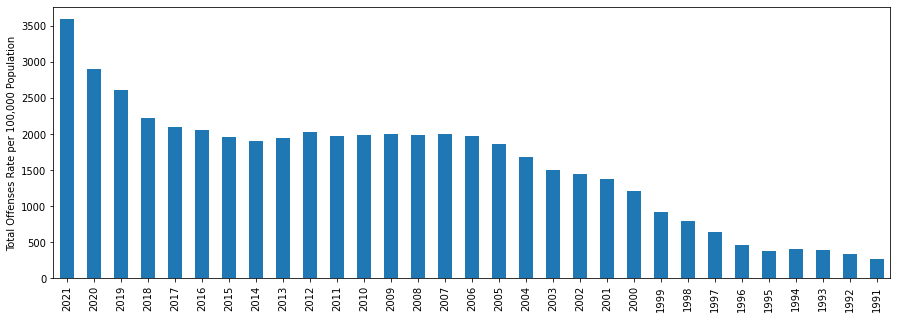

In [264]:
ddd = pd.DataFrame(di_total_crimes_rate, index = ['0'])
ddd.T['0'].plot(kind = 'bar', figsize = (15, 5))
plt.ylabel("Total Offenses Rate per 100,000 Population", fontsize = 10)

##############################################################################################

In [265]:
# pers_vectimdf2['age']=np.where((pers_vectimdf2['Age']) , '','')
# pers_vectimdf2['Sex']=np.where((pers_vectimdf2['sex']) , '','')
# pers_vectimdf2['Race/ethnicity']=np.where((pers_vectimdf2['race_ethnicity']) , '','')
# pers_vectimdf2['Offender Age']=np.where((pers_vectimdf2['offenderage']) , '','')
# pers_vectimdf2['Offender Sex']=np.where((pers_vectimdf2['offendersex']) , '','')
# pers_vectimdf2['Offender race/ethnicity']=np.where((pers_vectimdf2['offtracenew']) , '','')

In [266]:
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 1, '12-17',pers_vectimdf2['Age'])
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 2, '18-24',pers_vectimdf2['Age'])
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 3, '25-34',pers_vectimdf2['Age'])
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 4, '35-49',pers_vectimdf2['Age'])
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 5, '50-64',pers_vectimdf2['Age'])
# pers_vectimdf2['Age'] = np.where( pers_vectimdf2['Age'] == 6, '65 or older',pers_vectimdf2['Age'])

# pers_vectimdf2['sex'] = np.where( pers_vectimdf2['sex'] == 1, 'Male',pers_vectimdf2['sex'])
# pers_vectimdf2['sex'] = np.where( pers_vectimdf2['sex'] == 2, 'Female',pers_vectimdf2['sex'])

# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 1, 'Non-Hispanic white',pers_vectimdf2['race_ethnicity'])
# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 2, 'Non-Hispanic black',pers_vectimdf2['race_ethnicity'])
# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 3, 'Non-Hispanic American Indian/Alaska Native',pers_vectimdf2['race_ethnicity'])
# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',pers_vectimdf2['race_ethnicity'])
# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 5, 'Non-Hispanic more than one race',pers_vectimdf2['race_ethnicity'])
# pers_vectimdf2['race_ethnicity'] = np.where( pers_vectimdf2['race_ethnicity'] == 6, 'Hispanic',pers_vectimdf2['race_ethnicity'])

# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 1, '11 or younger',pers_vectimdf2['offenderage'])
# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 2, '12-17',pers_vectimdf2['offenderage'])
# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 3, '18-29',pers_vectimdf2['offenderage'])
# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 4, '30 or older',pers_vectimdf2['offenderage'])
# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 5, 'Multiple offenders of various ages',pers_vectimdf2['offenderage'])
# pers_vectimdf2['offenderage'] = np.where( pers_vectimdf2['offenderage'] == 88, 'Residue',pers_vectimdf2['offenderage'])

# pers_vectimdf2['offendersex'] = np.where( pers_vectimdf2['offendersex'] == 1, 'Male',pers_vectimdf2['offendersex'])
# pers_vectimdf2['offendersex'] = np.where( pers_vectimdf2['offendersex'] == 2, 'Female',pers_vectimdf2['offendersex'])
# pers_vectimdf2['offendersex'] = np.where( pers_vectimdf2['offendersex'] == 3, 'Both male and female offenders',pers_vectimdf2['offendersex'])
# pers_vectimdf2['offendersex'] = np.where( pers_vectimdf2['offendersex'] == 4, 'Unkown',pers_vectimdf2['offendersex'])
# pers_vectimdf2['offendersex'] = np.where( pers_vectimdf2['offendersex'] == 88, 'Residue',pers_vectimdf2['offendersex'])

# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == -1, 'Invalid until 2012 Q1',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 1, 'Non-Hispanic white',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 2, 'Non-Hispanic black',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 3, 'Non-Hispanic American Indian/ Alaska Native',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 5, 'Non-Hispanic more than one race',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 6, 'Hispanic',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 7, 'Unknown race/ethnicity',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 10, 'Mixed race group of offenders',pers_vectimdf2['offtracenew'])
# pers_vectimdf2['offtracenew'] = np.where( pers_vectimdf2['offtracenew'] == 10, 'Unknown number of offenders',pers_vectimdf2['offtracenew'])

In [267]:
pers_vectimdf2.columns

Index(['idper', 'yearq', 'year', 'Age', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'Annual household income',
       'Annual household income- imputed', 'marital', 'popsize', 'region',
       'msa', 'locality', 'educatn1', 'educatn2', 'veteran', 'citizen',
       'newcrime', 'Type of crime', 'seriousviolent', 'notify', 'vicservices',
       'locationr', 'direl', 'weapon', 'weapcat', 'injury', 'serious',
       'treatment', 'offenderage', 'offendersex', 'offtracenew', 'wgtviccy',
       'series', 'newwgt'],
      dtype='object')

In [268]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 2, (10, 4)), columns=list('abcd'))
display(df)
s = df['a'].value_counts()
display(s)
s = df['b'].value_counts()
display(s)
df.groupby(['a','b']).size().reset_index().rename(columns={0:'count'})

,a,b,c,d
0,0,1,1,0
1,1,1,1,1
2,1,1,1,0
3,0,1,0,0
4,0,0,0,1
5,0,1,1,0
6,0,1,1,1
7,1,0,1,0
8,1,0,1,1
9,0,1,1,0


0    6
1    4
Name: a, dtype: int64

1    7
0    3
Name: b, dtype: int64

,a,b,count
0,0,0,1
1,0,1,5
2,1,0,2
3,1,1,2


,Age,sex,race_ethnicity,count
0,12-17,Male,Non-Hispanic white,0.137714
1,12-17,Male,2,0.119132
2,12-17,Male,3,0.180000
3,12-17,Male,4,0.055172
4,12-17,Male,5,0.333333
...,...,...,...,...
67,6,2,2,0.018810
68,6,2,3,0.033473
69,6,2,4,0.014057
70,6,2,5,0.227273


Text(0, 0.5, 'demographics')

<Figure size 432x288 with 0 Axes>

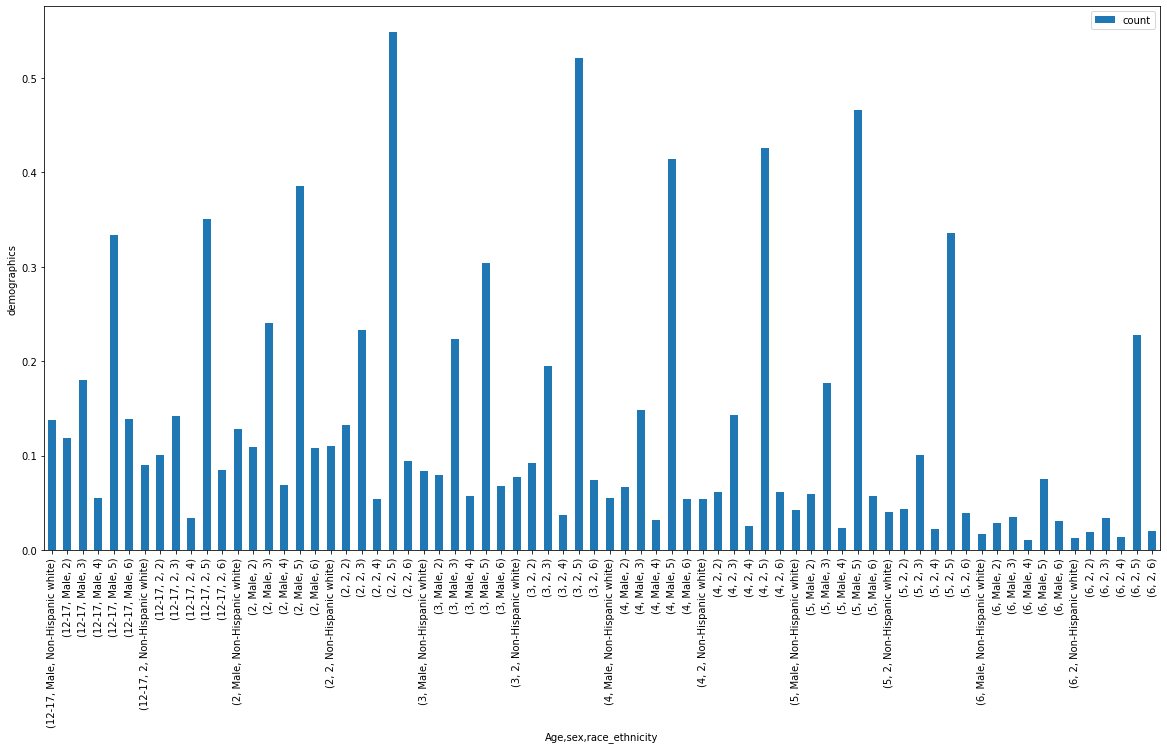

In [269]:
# 4, The frequency of non-fatal crime incidents in relation to victim demographics.
# demographics
demographics_wanted = pers_vectimdf2.groupby(['Age','sex', 'race_ethnicity']).size().reset_index().rename(columns={0:'count'})
demographics_for_normalization = pers_popdf2.groupby(['Age','sex', 'race_ethnicity']).size().reset_index().rename(columns={0:'count'})
demographics_wanted['count'] = demographics_wanted['count']/demographics_for_normalization['count']

demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 1, '12-17',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 2, '18-24',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 3, '25-34',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 4, '35-49',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 5, '50-64',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 6, '65 or older',demographics_wanted['Age'])
demographics_wanted['sex'] = np.where( demographics_wanted['sex'] == 1, 'Male',demographics_wanted['sex'])
demographics_wanted['sex'] = np.where( demographics_wanted['sex'] == 2, 'Female',demographics_wanted['sex'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 1, 'Non-Hispanic white',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 2, 'Non-Hispanic black',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 3, 'Non-Hispanic American Indian/Alaska Native',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 5, 'Non-Hispanic more than one race',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 6, 'Hispanic',demographics_wanted['race_ethnicity'])
display(demographics_wanted)
demographics_wanted.set_index(['Age','sex', 'race_ethnicity'], inplace=True)
plt.figure()
demographics_wanted.plot(y='count', kind='bar', figsize = (20, 10))
plt.ylabel("demographics", fontsize = 10)

,offenderage,offendersex,offtracenew,count
0,11 or younger,Male,-1,0.013760
1,11 or younger,Male,Non-Hispanic white,0.014111
2,11 or younger,Male,2,0.165714
3,11 or younger,Male,3,0.002299
4,11 or younger,Male,4,0.006006
...,...,...,...,...
65,3,2,10,0.000603
66,3,3,-1,0.002946
67,3,3,Non-Hispanic white,0.005286
68,3,3,2,0.171548


Text(0, 0.5, 'demographics')

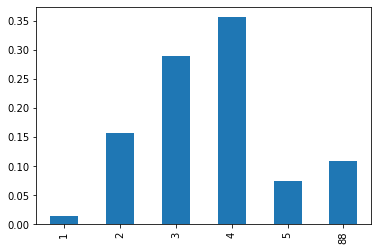

<Figure size 432x288 with 0 Axes>

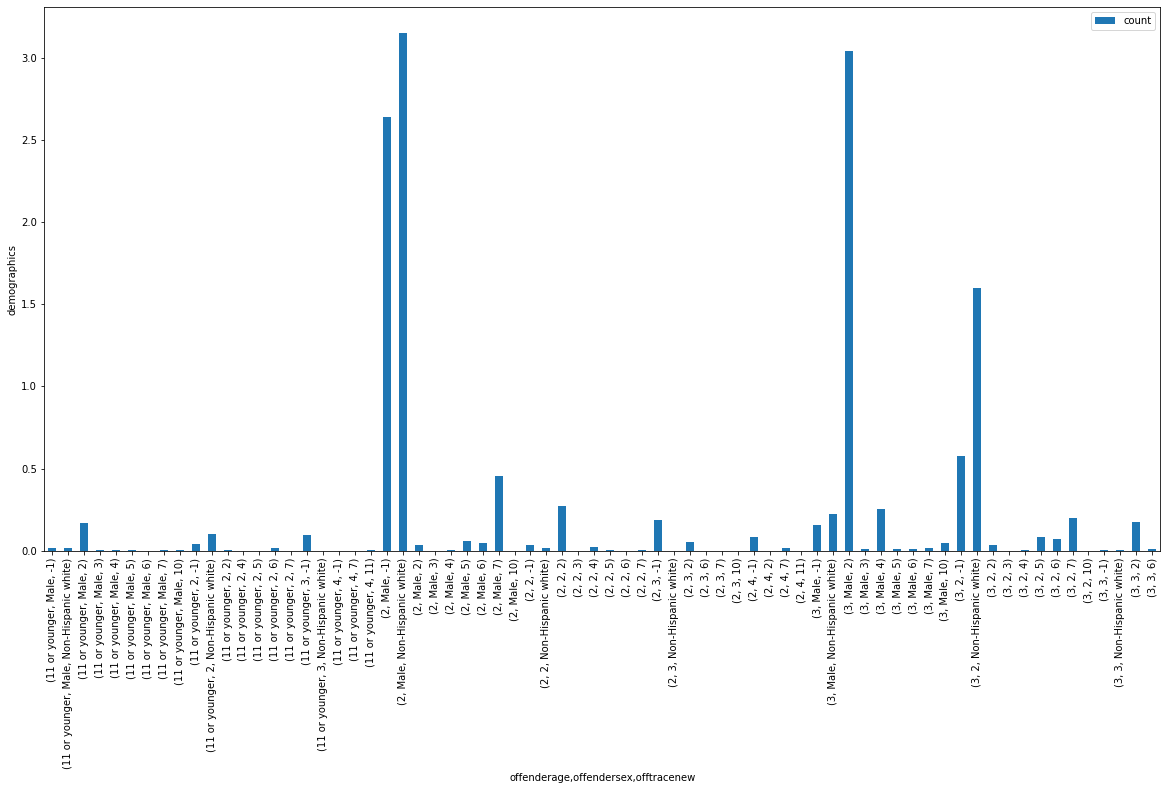

In [270]:
# 5, The frequency of non-fatal crime incidents in relation to offender demographics.
age_wanted = pers_vectimdf2['offenderage'].value_counts().sort_index()
age_for_normalization = pers_vectimdf2['offenderage'].value_counts().sum()
normalized_age = age_wanted/age_for_normalization
plt.figure()
normalized_age.plot(kind='bar')
# demographics (ather than age)
demographics_wanted = pers_vectimdf2.groupby(['offenderage', 'offendersex', 'offtracenew']).size().reset_index().rename(columns={0:'count'})
demographics_for_normalization = pers_popdf2.groupby(['Age','sex', 'race_ethnicity']).size().reset_index().rename(columns={0:'count'})
demographics_wanted['count'] = demographics_wanted['count']/demographics_for_normalization['count']
demographics_wanted['offenderage'] = np.where( demographics_wanted['offenderage'] == 1, '11 or younger',demographics_wanted['offenderage'])
demographics_wanted['offenderage'] = np.where( demographics_wanted['offenderage'] == 2, '12-17',demographics_wanted['offenderage'])
demographics_wanted['offenderage'] = np.where( demographics_wanted['offenderage'] == 3, '18-29',demographics_wanted['offenderage'])
demographics_wanted['offenderage'] = np.where( demographics_wanted['offenderage'] == 4, '30 or older',demographics_wanted['offenderage'])
demographics_wanted['offenderage'] = np.where( demographics_wanted['offenderage'] == 5, 'Multiple offenders of various age',demographics_wanted['offenderage'])
demographics_wanted['offendersex'] = np.where( demographics_wanted['offendersex'] == 1, 'Male',demographics_wanted['offendersex'])
demographics_wanted['offendersex'] = np.where( demographics_wanted['offendersex'] == 2, 'Female',demographics_wanted['offendersex'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 1, 'Non-Hispanic white',demographics_wanted['offtracenew'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 2, 'Non-Hispanic black',demographics_wanted['offtracenew'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 3, 'Non-Hispanic American Indian/Alaska Native',demographics_wanted['offtracenew'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',demographics_wanted['offtracenew'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 5, 'Non-Hispanic more than one race',demographics_wanted['offtracenew'])
demographics_wanted['offtracenew'] = np.where( demographics_wanted['offtracenew'] == 6, 'Hispanic',demographics_wanted['offtracenew'])
#display(demographics_wanted)
demographics_wanted = demographics_wanted.head(70)
display(demographics_wanted)
demographics_wanted.set_index(['offenderage', 'offendersex', 'offtracenew'], inplace=True)
plt.figure()
demographics_wanted.plot(y='count', kind='bar', figsize = (20, 10))
plt.ylabel("demographics", fontsize = 10)

Annual household income 
 
 
 educatn1 
 Annual household income 
 
 
 
 
 
 1 
 2 
 0.309278 
 
 
 1 
 0.247423 
 
 
 3 
 0.144330 
 
 
 88 
 0.103093 
 
 
 4 
 0.082474 
 
 
 5 
 0.072165 
 
 
 7 
 0.030928 
 
 
 6 
 0.010309 
 
 
 2 
 5 
 0.146685 
 
 
 2 
 0.143865 
 
 
 3 
 0.139633 
 
 
 6 
 0.132581 
 
 
 4 
 0.122708 
 
 
 88 
 0.122003 
 
 
 7 
 0.102962 
 
 
 1 
 0.089563 
 
 
 3 
 5 
 0.143758 
 
 
 3 
 0.143489 
 
 
 7 
 0.137589 
 
 
 4 
 0.130616 
 
 
 6 
 0.129677 
 
 
 2 
 0.124983 
 
 
 88 
 0.105404 
 
 
 1 
 0.084484 
 
 
 4 
 3 
 0.154128 
 
 
 2 
 0.140852 
 
 
 4 
 0.129445 
 
 
 5 
 0.127461 
 
 
 88 
 0.123760 
 
 
 1 
 0.123684 
 
 
 6 
 0.108805 
 
 
 7 
 0.091866 
 
 
 5 
 7 
 0.229664 
 
 
 6 
 0.159259 
 
 
 5 
 0.145792 
 
 
 4 
 0.108387 
 
 
 3 
 0.104416 
 
 
 88 
 0.102971 
 
 
 2 
 0.082789 
 
 
 1 
 0.066722 
 
 
 88 
 88 
 0.333904 
 
 
 5 
 0.119863 
 
 
 7 
 0.118151 
 
 
 3 
 0.094178 
 
 
 4 
 0.090753 
 
 
 1 
 0.082192 
 
 
 6 
 0.082192 
 
 
 2 
 0.078767

educatn1 
 
 
 Annual household income 
 educatn1 
 
 
 
 
 
 1 
 4 
 0.547728 
 
 
 5 
 0.312215 
 
 
 3 
 0.106437 
 
 
 2 
 0.021456 
 
 
 88 
 0.008109 
 
 
 1 
 0.004055 
 
 
 2 
 4 
 0.512992 
 
 
 5 
 0.318605 
 
 
 3 
 0.129498 
 
 
 2 
 0.028345 
 
 
 88 
 0.006392 
 
 
 1 
 0.004168 
 
 
 3 
 4 
 0.488572 
 
 
 5 
 0.349740 
 
 
 3 
 0.129399 
 
 
 2 
 0.023945 
 
 
 88 
 0.006651 
 
 
 1 
 0.001693 
 
 
 4 
 4 
 0.446213 
 
 
 5 
 0.394792 
 
 
 3 
 0.128090 
 
 
 2 
 0.022883 
 
 
 88 
 0.006970 
 
 
 1 
 0.001052 
 
 
 5 
 5 
 0.462225 
 
 
 4 
 0.382440 
 
 
 3 
 0.122711 
 
 
 2 
 0.023810 
 
 
 88 
 0.008013 
 
 
 1 
 0.000801 
 
 
 6 
 5 
 0.520964 
 
 
 4 
 0.336837 
 
 
 3 
 0.114208 
 
 
 2 
 0.022204 
 
 
 88 
 0.005669 
 
 
 1 
 0.000118 
 
 
 7 
 5 
 0.635274 
 
 
 4 
 0.240487 
 
 
 3 
 0.102467 
 
 
 2 
 0.014581 
 
 
 88 
 0.006891 
 
 
 1 
 0.000300 
 
 
 88 
 4 
 0.446832 
 
 
 5 
 0.392837 
 
 
 3 
 0.108264 
 
 
 88 
 0.026860 
 
 
 2 
 0.023829 
 
 
 1 
 0.001377

Text(0, 0.5, 'victim’s gross household income, and their rate of victimization.')

<Figure size 432x288 with 0 Axes>

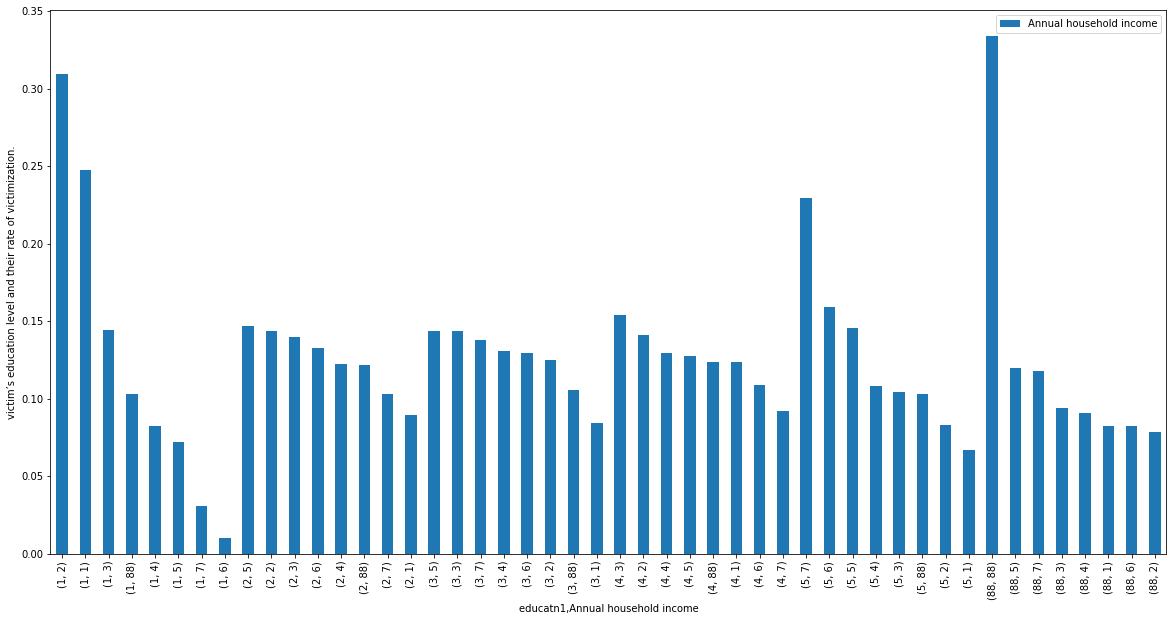

<Figure size 432x288 with 0 Axes>

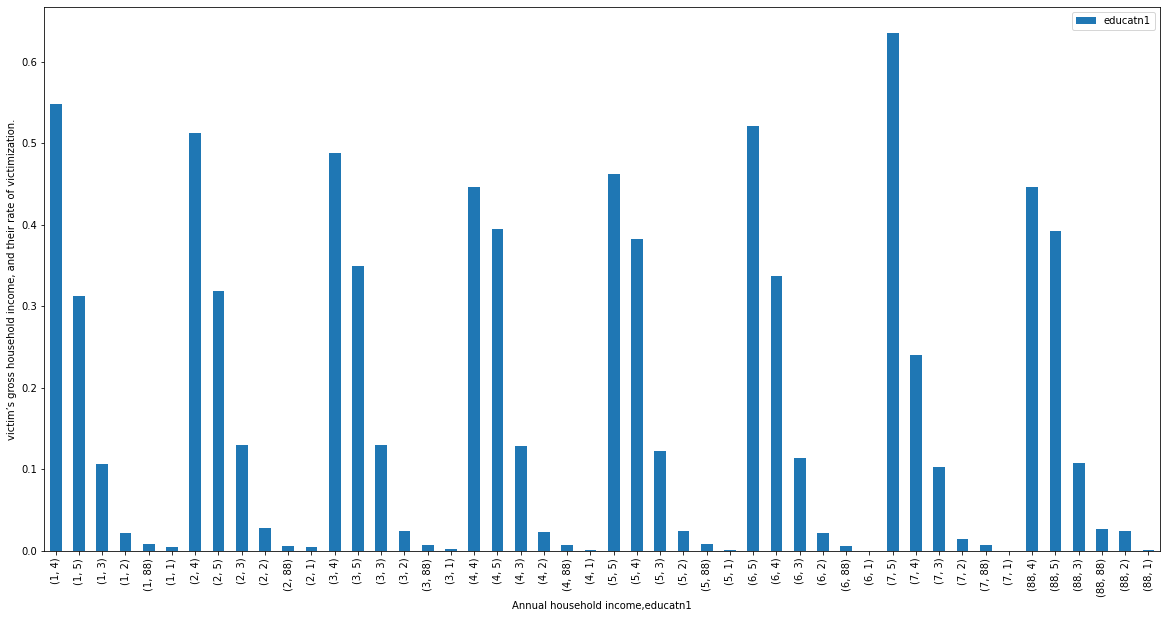

In [271]:
# 6, The relationship between the victim’s education level, their gross household income, and their rate of victimization.
s = pers_vectimdf2[['educatn1','Annual household income']]
s1 = s.groupby('educatn1')['Annual household income'].value_counts(normalize=True)
s1 = s1.to_frame()
display(s1)
plt.figure()
s1.plot(y = 'Annual household income', kind='bar', figsize = (20, 10))
plt.ylabel("victim’s education level and their rate of victimization.", fontsize = 10)

s2 = s.groupby('Annual household income')['educatn1'].value_counts(normalize=True)
s2 = s2.to_frame()
display(s2)
plt.figure()
s2.plot(y = 'educatn1', kind='bar', figsize = (20, 10))
plt.ylabel("victim’s gross household income, and their rate of victimization.", fontsize = 10)

## III) **Answering Questions:**

<ipython-input-272-6970e62166c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1a["Type of crime"] = df1a["Type of crime"].map({ 1:1, 2:2,3:7, 4:4, 5:5})
<ipython-input-272-6970e62166c9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['notify']= df11['notify'].map({1:1,  2:0, 3:7})


Index(['notify', 'Type of crime'], dtype='object')

notify 
 
 
 Type of crime 
 notify 
 
 
 
 
 
 1 
 0 
 0.674792 
 
 
 1 
 0.325208 
 
 
 2 
 1 
 0.596823 
 
 
 0 
 0.403177 
 
 
 3 
 1 
 0.591993 
 
 
 0 
 0.408007 
 
 
 4 
 0 
 0.588360 
 
 
 1 
 0.411640 
 
 
 5 
 0 
 0.608374 
 
 
 1 
 0.391626

notify 
 
 
 direl 
 notify 
 
 
 
 
 
 1 
 1.0 
 0.543286 
 
 
 0.0 
 0.456714 
 
 
 2 
 1.0 
 0.542090 
 
 
 0.0 
 0.457910 
 
 
 3 
 0.0 
 0.606884 
 
 
 1.0 
 0.393116 
 
 
 4 
 0.0 
 0.521329 
 
 
 1.0 
 0.478671 
 
 
 5 
 0.0 
 0.514863 
 
 
 1.0 
 0.485137 
 
 
 6 
 0.0 
 0.604167 
 
 
 1.0 
 0.395833

direl 
 
 
 notify 
 direl 
 
 
 
 
 
 0.0 
 4 
 0.419572 
 
 
 3 
 0.348417 
 
 
 1 
 0.098306 
 
 
 2 
 0.052135 
 
 
 6 
 0.043025 
 
 
 5 
 0.038545 
 
 
 1.0 
 4 
 0.451049 
 
 
 3 
 0.264244 
 
 
 1 
 0.136916 
 
 
 2 
 0.072262 
 
 
 5 
 0.042524 
 
 
 6 
 0.033004

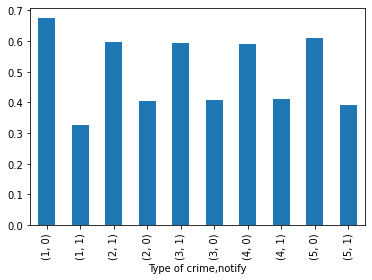

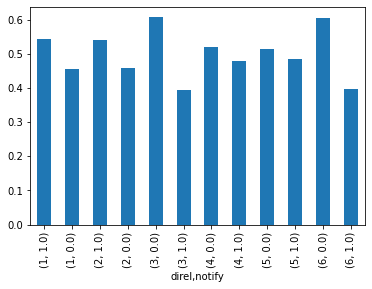

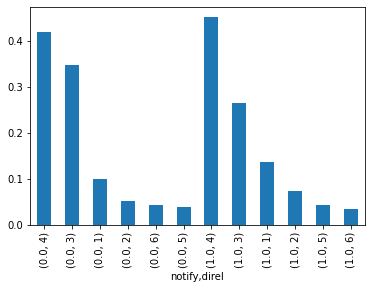

In [272]:
# 1, Which type of non-fatal crime is the most under-reported? 
df1a = pers_vectimdf2[["notify","Type of crime"]]
display(df1a.columns)
df1a["Type of crime"] = df1a["Type of crime"].map({ 1:1, 2:2,3:7, 4:4, 5:5})
df1a = df1a[(~df1a.iloc[:, :].isin([3,8])).all(axis=1)]
df1a["Type of crime"]= df1a["Type of crime"].map({1:1, 2:2, 4:4, 5:5, 7:3})
df1a["notify"]= df1a["notify"].map({1:1,  2:0})
df1a = df1a.groupby("Type of crime")["notify"].value_counts(normalize=True)
plt.figure()
df1a.plot.bar()
df1a = df1a.to_frame()
display(df1a)
# Is there an association between the offender-victim relationship and the likelihood of a crime being reported?
df11 = pers_vectimdf2[["notify","direl"]]
df11['notify']= df11['notify'].map({1:1,  2:0, 3:7})
df11 = df11[(~df11.iloc[:, :].isin([7,8])).all(axis=1)]
df111 = df11.groupby('direl')['notify'].value_counts(normalize=True)
df112 = df11.groupby('notify')['direl'].value_counts(normalize=True)

plt.figure()
df111.plot.bar()
df111 = df111.to_frame()
display(df111)

plt.figure()
df112.plot.bar()
df112 = df112.to_frame()
display(df112)

<ipython-input-273-e83112f39499>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 1, '12-17',demographics_wanted['Age'])
<ipython-input-273-e83112f39499>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 2, '18-24',demographics_wanted['Age'])
<ipython-input-273-e83112f39499>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

pandas.core.frame.DataFrame

Text(0, 0.5, 'demographics')

<Figure size 432x288 with 0 Axes>

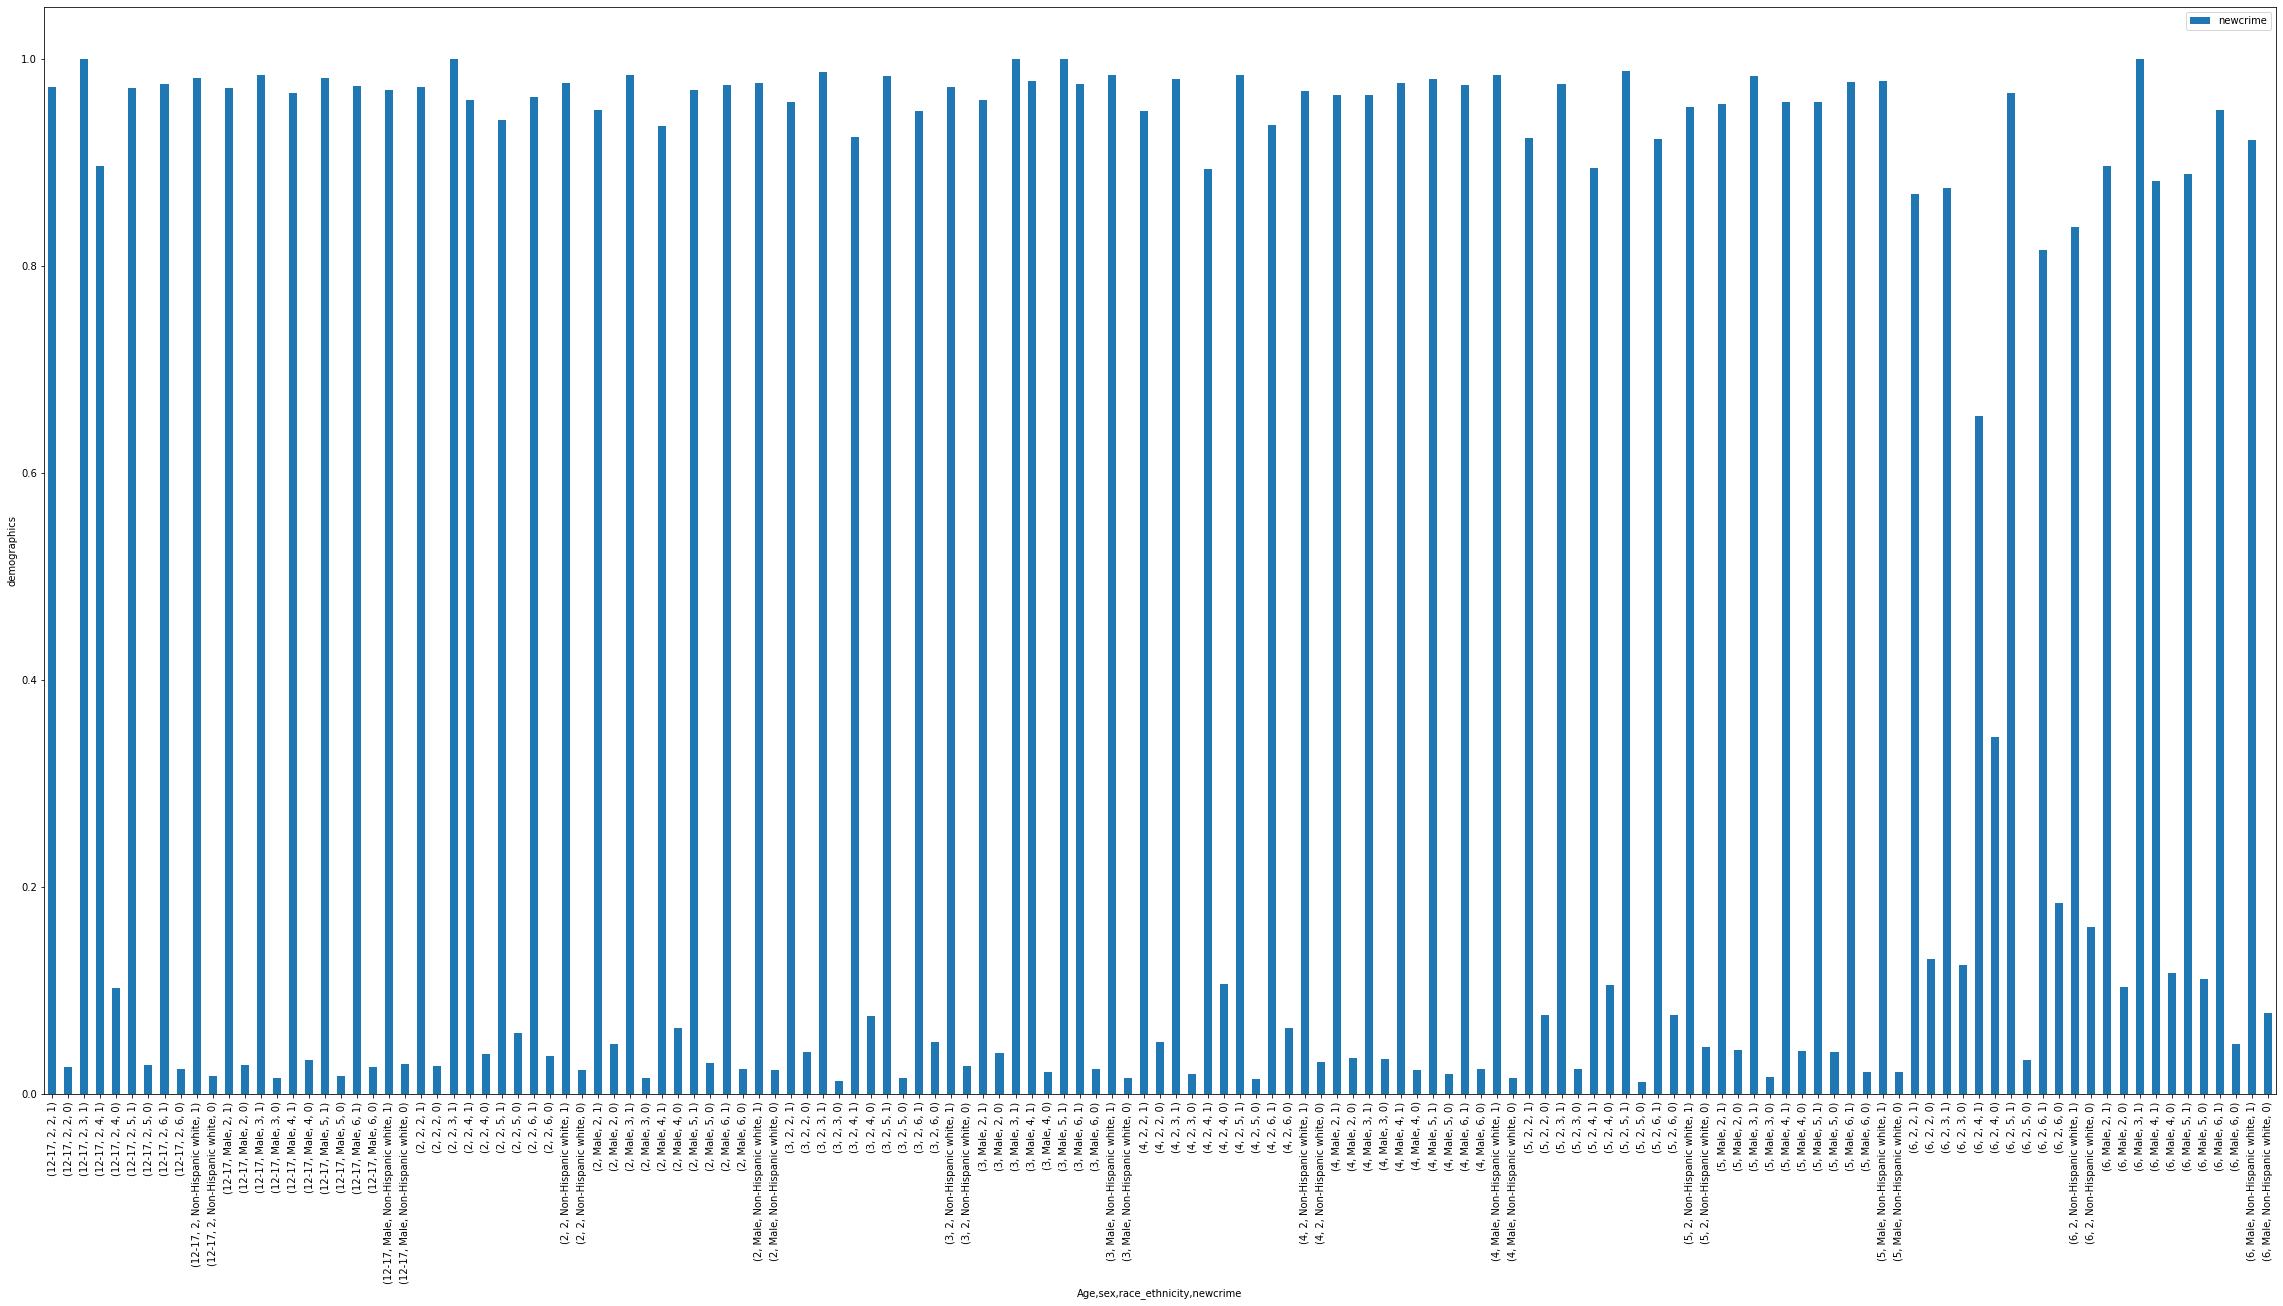

In [273]:
# 2, Who are the people (the demographic segment) that appear to be most at risk of violent victimization? 
# Who is the least at risk?
demographics_wanted = pers_vectimdf2[['newcrime','Age', 'sex', 'race_ethnicity']]
# demographics_wanted1= demographics_wanted[demographics_wanted['newcrime']==1]
# demographics_wanted2 = demographics_wanted[demographics_wanted['newcrime']==2]
# demographics_wanted = pd.concat([demographics_wanted1, demographics_wanted2], axis=0)

demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 1, '12-17',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 2, '18-24',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 3, '25-34',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 4, '35-49',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 5, '50-64',demographics_wanted['Age'])
demographics_wanted['Age'] = np.where( demographics_wanted['Age'] == 6, '65 or older',demographics_wanted['Age'])
demographics_wanted['sex'] = np.where( demographics_wanted['sex'] == 1, 'Male',demographics_wanted['sex'])
demographics_wanted['sex'] = np.where( demographics_wanted['sex'] == 2, 'Female',demographics_wanted['sex'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 1, 'Non-Hispanic white',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 2, 'Non-Hispanic black',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 3, 'Non-Hispanic American Indian/Alaska Native',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 5, 'Non-Hispanic more than one race',demographics_wanted['race_ethnicity'])
demographics_wanted['race_ethnicity'] = np.where( demographics_wanted['race_ethnicity'] == 6, 'Hispanic',demographics_wanted['race_ethnicity'])
#demographics_wanted = demographics_wanted[['Age', 'sex', 'race_ethnicity']]
demographics_wanted['newcrime']= demographics_wanted['newcrime'].map({1:1,  2:0})
demographics_wanted = demographics_wanted.groupby(['Age', 'sex', 'race_ethnicity'])['newcrime'].value_counts(normalize=True)
#display(demographics_wanted)
demographics_wanted = demographics_wanted.to_frame()
demographics_wanted[77:90]
#demographics_wanted[1][4] = 'newcrime'
#demographics_wanted = demographics_wanted.iloc[1:]
display(type(demographics_wanted))
#demographics_wanted.set_index(['Age','sex', 'race_ethnicity'], inplace=True)
plt.figure()
demographics_wanted.plot(y='newcrime', kind='bar', figsize = (40, 20))
plt.ylabel("demographics", fontsize = 10)

treatment 
 
 
 Age 
 sex 
 race_ethnicity 
 treatment 
 
 
 
 
 
 12-17 
 2 
 2 
 0 
 0.572072 
 
 
 1 
 0.427928 
 
 
 3 
 1 
 0.555556 
 
 
 0 
 0.444444 
 
 
 4 
 0 
 0.636364 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 6 
 Male 
 5 
 1 
 1.000000 
 
 
 6 
 1 
 0.666667 
 
 
 0 
 0.333333 
 
 
 Non-Hispanic white 
 1 
 0.566667 
 
 
 0 
 0.433333 
 
 
 
 141 rows × 1 columns

Text(0, 0.5, 'demographics')

<Figure size 432x288 with 0 Axes>

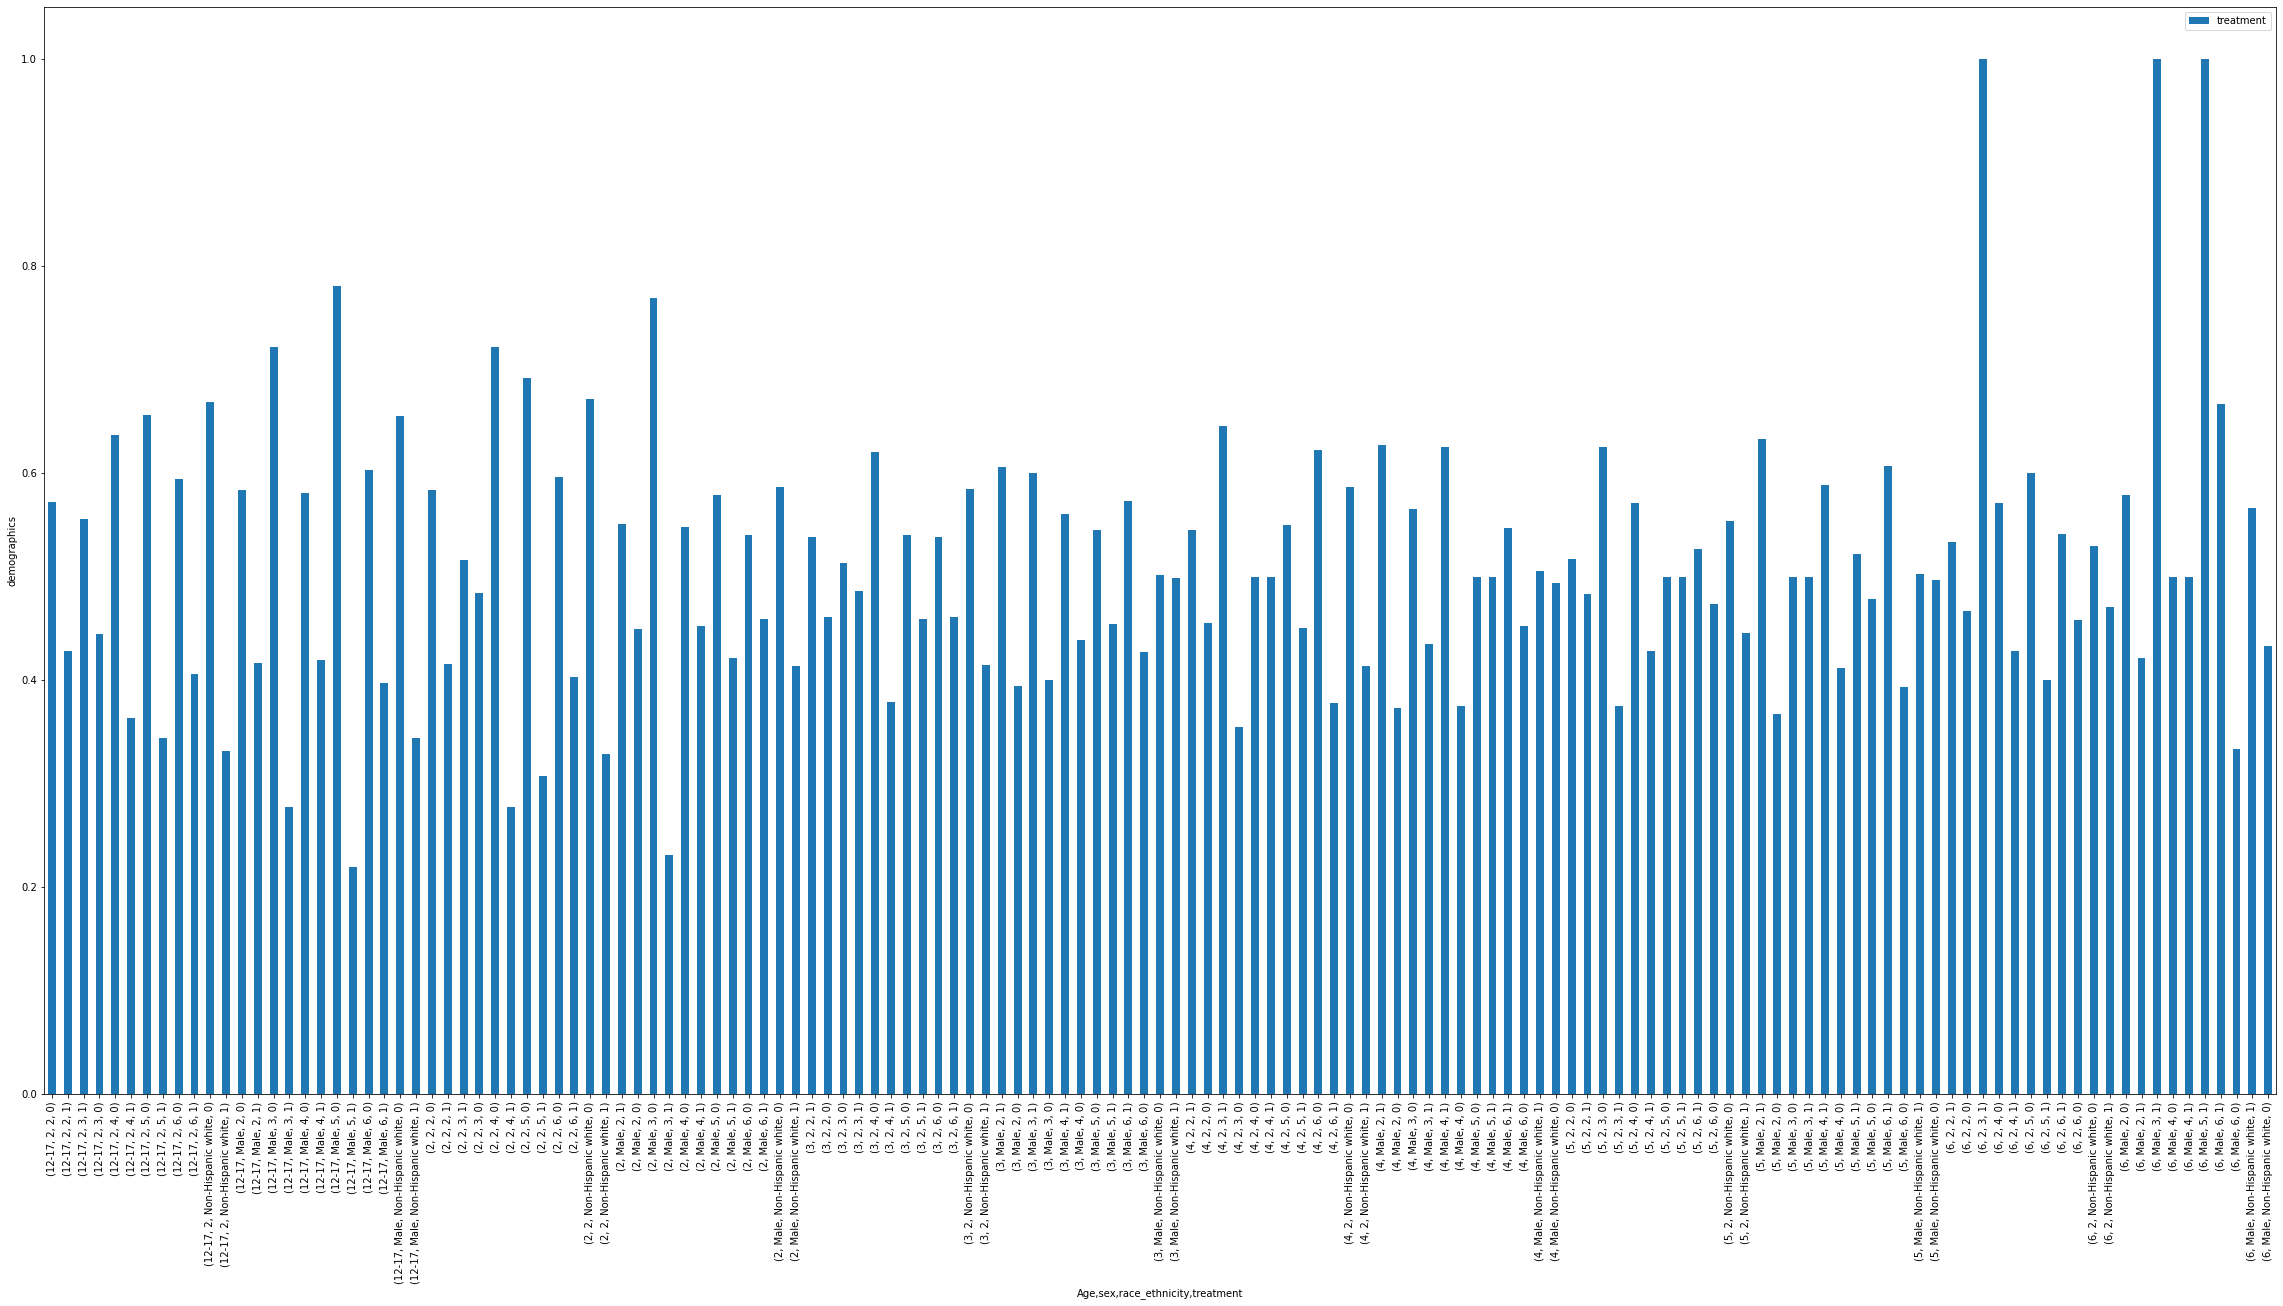

In [274]:
# 3, Of all victims of non-fatal crimes who suffer an injury, 
# which demographic is the most likely to receive medical attention at the scene?
# Which is the least likely?
df3 = pers_vectimdf2[pers_vectimdf2["injury"] == 1]
df3 = df3[['treatment','Age', 'sex', 'race_ethnicity']]
df3['Age']= df3['Age'].map({3:7, 1:1, 2:2, 4:4, 5:5, 6:6})
df3['race_ethnicity']= df3['race_ethnicity'].map({3:7, 1:1, 2:2, 4:4, 5:5, 6:6})
df3 = df3[(~df3.iloc[:, :].isin([0,3,88])).all(axis=1)]
df3['treatment']= df3['treatment'].map({1:0,  2:1})
df3['Age']= df3['Age'].map({7:3, 1:1, 2:2, 4:4, 5:5, 6:6})
df3['race_ethnicity']= df3['race_ethnicity'].map({7:3, 1:1, 2:2, 4:4, 5:5, 6:6})
df3['Age'] = np.where( df3['Age'] == 1, '12-17',df3['Age'])
df3['Age'] = np.where( df3['Age'] == 2, '18-24',df3['Age'])
df3['Age'] = np.where( df3['Age'] == 3, '25-34',df3['Age'])
df3['Age'] = np.where( df3['Age'] == 4, '35-49',df3['Age'])
df3['Age'] = np.where( df3['Age'] == 5, '50-64',df3['Age'])
df3['Age'] = np.where( df3['Age'] == 6, '65 or older',df3['Age'])
df3['sex'] = np.where( df3['sex'] == 1, 'Male',df3['sex'])
df3['sex'] = np.where( df3['sex'] == 2, 'Female',df3['sex'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 1, 'Non-Hispanic white',df3['race_ethnicity'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 2, 'Non-Hispanic black',df3['race_ethnicity'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 3, 'Non-Hispanic American Indian/Alaska Native',df3['race_ethnicity'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 4, 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',df3['race_ethnicity'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 5, 'Non-Hispanic more than one race',df3['race_ethnicity'])
df3['race_ethnicity'] = np.where( df3['race_ethnicity'] == 6, 'Hispanic',df3['race_ethnicity'])

df31 = df3.groupby(['Age', 'sex', 'race_ethnicity'])['treatment'].value_counts(normalize=True)
df31 = df31.to_frame()
display(df31)
plt.figure()
df31.plot(kind='bar', figsize = (40, 20))
plt.ylabel("demographics", fontsize = 10)

In [275]:
georgiadf = pd.read_csv('georgia_recidivism.csv')
georgiadf

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.000000,0.0,0.189507,0.572044,False,True,True,False,False,1
25831,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.757098,0.576104,False,True,False,True,False,1
25832,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,1
25833,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.000000,0.000000,True,False,False,False,False,1


In [276]:
georgiadf.isna().sum()

id 0
gender 0
race 0
age_at_release 0
residence_puma 0
gang_affiliated 3167
supervision_risk_score_first 475
supervision_level_first 1720
education_level 0
dependents 0
prison_offense 3277
prison_years 0
prior_arrest_episodes_felony 0
prior_arrest_episodes_misd 0
prior_arrest_episodes_violent 0
prior_arrest_episodes_property 0
prior_arrest_episodes_drug 0
prior_arrest_episodes 0
prior_arrest_episodes_1 0
prior_arrest_episodes_2 0
prior_conviction_episodes 0
prior_conviction_episodes_1 0
prior_conviction_episodes_2 0
prior_conviction_episodes_3 0
prior_conviction_episodes_4 0
prior_conviction_episodes_5 0
prior_conviction_episodes_6 0
prior_conviction_episodes_7 0
prior_revocations_parole 0
prior_revocations_probation 0
condition_mh_sa 0
condition_cog_ed 0
condition_other 0
violations 0
violations_instruction 0
violations_failtoreport 0
violations_1 0
delinquency_reports 0
program_attendances 0
program_unexcusedabsences 0
residence_changes 0
avg_days_per_drugtest 6103
drugtests_thc_positive 5172
drugtests_cocaine_positive 5172
drugtests_meth_positive 5172
drugtests_other_positive 5172
percent_days_employed 462
jobs_per_year 808
employment_exempt 0
recidivism_within_3years 0
recidivism_arrest_year1 0
recidivism_arrest_year2 0
recidivism_arrest_year3 0
training_sample 0
dtype: int64

In [277]:
georgiadf['prison_offense'] = georgiadf['prison_offense'].fillna(False)

recidivism_within_3years 
 
 
 prison_offense 
 recidivism_within_3years 
 
 
 
 
 
 False 
 True 
 0.566067 
 
 
 False 
 0.433933 
 
 
 Drug 
 True 
 0.540270 
 
 
 False 
 0.459730 
 
 
 Property 
 True 
 0.642564 
 
 
 False 
 0.357436 
 
 
 Violent/Non-Sex 
 True 
 0.539726 
 
 
 False 
 0.460274 
 
 
 Violent/Sex 
 False 
 0.684337 
 
 
 True 
 0.315663

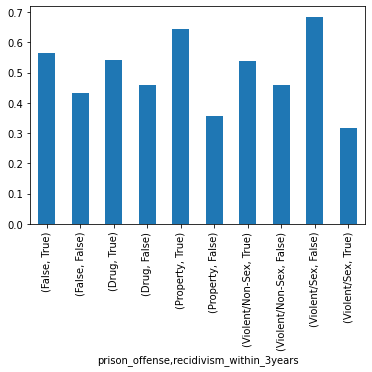

In [278]:
# 4, Which class of crimes is associated with the highest rate of same-offense-recidivism; 
#i.e. prison re-entry for the same offense within 3 years of release?
df11 = georgiadf[["prison_offense","recidivism_within_3years"]]
df11 = df11[(~df11.iloc[:, :].isin(['nan','Other'])).all(axis=1)]
#df111 = df11.groupby('prison_offense')['recidivism_within_3years'].value_counts(normalize=True)
df112 = df11.groupby('prison_offense')['recidivism_within_3years'].value_counts(normalize=True)
#plt.figure()
#df111.plot.bar()
#df111 = df111.to_frame()
#display(df111)
plt.figure()
df112.plot.bar()
df112 = df112.to_frame()
display(df112)

recidivism_within_3years 
 
 
 age_at_release 
 recidivism_within_3years 
 
 
 
 
 
 18-22 
 True 
 0.719748 
 
 
 False 
 0.280252 
 
 
 23-27 
 True 
 0.664219 
 
 
 False 
 0.335781 
 
 
 28-32 
 True 
 0.614613 
 
 
 False 
 0.385387 
 
 
 33-37 
 True 
 0.572465 
 
 
 False 
 0.427535 
 
 
 38-42 
 True 
 0.529569 
 
 
 False 
 0.470431 
 
 
 43-47 
 True 
 0.506107 
 
 
 False 
 0.493893 
 
 
 48 or older 
 False 
 0.581164 
 
 
 True 
 0.418836

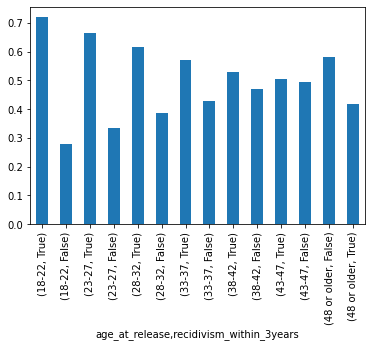

In [279]:
# 5, Are prisoners who are younger at the time of release more or less likely to reoffend than those who are older?
df11 = georgiadf[["age_at_release","recidivism_within_3years"]]
df11 = df11[(~df11.iloc[:, :].isin(['nan','Other'])).all(axis=1)]
#df111 = df11.groupby('age_at_release')['recidivism_within_3years'].value_counts(normalize=True)
df112 = df11.groupby('age_at_release')['recidivism_within_3years'].value_counts(normalize=True)
#plt.figure()
#df111.plot.bar()
#df111 = df111.to_frame()
#display(df111)
plt.figure()
df112.plot.bar()
df112 = df112.to_frame()
display(df112)

## IV) **Hypothesis Testing:**

In [280]:
offensecountdf2

,stateName,offenseName,offenseCount,Year,offenseCategory
11946,Illinois,murder-and-nonnegligent-manslaughter,2,1991,Homicide-Offenses
26220,South Carolina,simple-assault,43133,1991,Assault-Offenses
16029,Alabama,sex-offenses-non-forcible,36,1991,Sex-Offenses-Non-Forcible
25871,South Carolina,operating-promoting-assiting-gambling,88,1991,Gambling-Offenses
25308,South Carolina,credit-card-automated-teller-machine-fraud,878,1991,Fraud-Offenses
...,...,...,...,...,...
16032,Alabama,sex-offenses-non-forcible,151,2021,Sex-Offenses-Non-Forcible
16028,Alabama,sex-offenses-non-forcible,5,2021,Sex-Offenses-Non-Forcible
16024,Alabama,sexual-assult-with-an-object,286,2021,Sex-Offenses
15639,Alabama,betting,12,2021,Gambling-Offenses


In [281]:
fire_lawsdf

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Wyoming,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1496,Wyoming,2017,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1497,Wyoming,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1498,Wyoming,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [282]:
fire_bookdf

,Category Code,Category,Sub-Category,Variable Name,Brief Description of Provision,Detailed Description of Provision,Coding Notes,Coding Instructions,Notes,Data Source and Attribution
0,1,Dealer regulations,Licensing,dealer,State dealer license required for sale of all ...,All firearm dealers are required to have a sta...,State requires all persons engaged in the busi...,If all firearm dealers are required to have a ...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
1,1,Dealer regulations,Licensing,dealerh,State dealer license required for sale of hand...,All firearm dealers that sell handguns are req...,State requires all persons engaged in the busi...,If only dealers of handguns or handguns AND as...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
2,1,Dealer regulations,Recordkeeping,recordsdealer,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
3,1,Dealer regulations,Recordkeeping,recordsdealerh,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
4,1,Dealer regulations,Recordkeeping,recordsall,All private sellers and licensed dealers are r...,Both private sellers and licensed dealers are ...,Recordkeeping refers to the recording of sales...,If all private sellers and licensed dealers ar...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
...,...,...,...,...,...,...,...,...,...,...
129,14,Domestic violence,Restraining order,expartesurrender,State law requires ex parte DVRO subjects to s...,Law requires subjects of an ex parte DVRO to t...,This provision means that the requirement for ...,If expartesurrendernoconditions or expartesurr...,NaN,Coded using a database created by Everytown fo...
130,14,Domestic violence,Restraining order,expartesurrendernoconditions,No additional finding is required before the e...,Law requires subjects of an ex parte DVRO to t...,This provision means that the requirement for ...,NaN,NaN,Coded using a database created by Everytown fo...
131,14,Domestic violence,Restraining order,expartesurrenderdating,The ex parte DVRO surrender provisions apply i...,Law requires subjects of an ex parte DVRO to t...,This provision means that the requirement for ...,NaN,NaN,Coded using a database created by Everytown fo...
132,14,Domestic violence,Restraining order,dvroremoval,Law enforcement officials are required to remo...,Law requires law enforcement officials to remo...,This provision means that law enforcement offi...,NaN,NaN,Coded using a database created by Everytown fo...


In [283]:
# 4.1
df_part4_1 = fire_lawsdf[['state','year','lawtotal']]
df_part4_1_y1 = df_part4_1[df_part4_1['year']==2009]
df_part4_1_y1 = df_part4_1_y1[['state','lawtotal']]
df_part4_1_y2 = df_part4_1[df_part4_1['year']==2009]
df_part4_1_y2 = df_part4_1_y2[['state','lawtotal']]
mean1 = df_part4_1_y1['lawtotal'].mean()
mean2 = df_part4_1_y2['lawtotal'].mean()
##############
df_part4_2 = offensecountdf2[['stateName', 'offenseCount','Year']]
df_part4_2_y1 = df_part4_2[df_part4_2['Year']==2019]
df_part4_2_y1 = df_part4_2_y1[['stateName','offenseCount']]
df_part4_2_y2 = df_part4_2[df_part4_2['Year']==2019]
df_part4_2_y2 = df_part4_2_y2[['stateName','offenseCount']]

df_part4_2_y1.rename(columns={'stateName': 'state'},
                               inplace=True, errors='raise')
df_part4_2_y2.rename(columns={'stateName': 'state'},
                               inplace=True, errors='raise')
concat_part4_y1 = pd.merge(df_part4_1_y1, df_part4_2_y1, how='inner')
concat_part4_y2 = pd.merge(df_part4_1_y2, df_part4_2_y2, how='inner')
display(concat_part4_y1)
display(concat_part4_y2)
#############
st_y1 = concat_part4_y1[concat_part4_y1['lawtotal']<=mean1]
nst_y1 = concat_part4_y1[concat_part4_y1['lawtotal']>mean1]
t_statistic1, p_value1 = stats.ttest_ind(st_y1['offenseCount'], nst_y1['offenseCount'])
st_y2 = concat_part4_y2[concat_part4_y2['lawtotal']<=mean2]
nst_y2 = concat_part4_y2[concat_part4_y2['lawtotal']>mean2]
t_statistic2, p_value2 = stats.ttest_ind(st_y2['offenseCount'], nst_y2['offenseCount'])
display(p_value1)
display(p_value2)

,state,lawtotal,offenseCount
0,Alabama,11,4
1,Alabama,11,4
2,Alabama,11,103
3,Alabama,11,4
4,Alabama,11,2
...,...,...,...
2280,Wyoming,9,15
2281,Wyoming,9,20
2282,Wyoming,9,221
2283,Wyoming,9,60


,state,lawtotal,offenseCount
0,Alabama,11,4
1,Alabama,11,4
2,Alabama,11,103
3,Alabama,11,4
4,Alabama,11,2
...,...,...,...
2280,Wyoming,9,15
2281,Wyoming,9,20
2282,Wyoming,9,221
2283,Wyoming,9,60


0.00280899778434362

0.00280899778434362

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Year 2019')

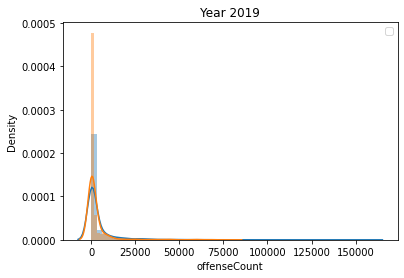

In [284]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(st_y1['offenseCount'])
sns.distplot(nst_y1['offenseCount'])
plt.legend()
plt.xlabel('offenseCount')
plt.title("Year 2019")

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Year 2020')

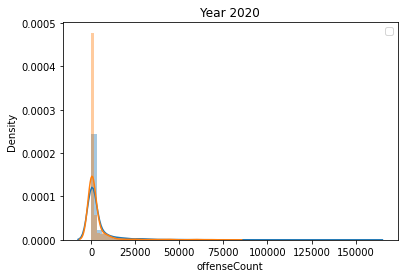

In [285]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(st_y2['offenseCount'])
sns.distplot(nst_y2['offenseCount'])
plt.legend()
plt.xlabel('offenseCount')
plt.title("Year 2020")

In [286]:
## 4.2 peaple tend to be more violent over the years.
df_part4_2 = offensecountdf2[['offenseCount','Year']]
med = df_part4_2['Year'].median()
#display(mean)
#############
st_y1 = df_part4_2[df_part4_2['Year']<=med]
nst_y1 = df_part4_2[df_part4_2['Year']>med]
t_statistic1, p_value1 = stats.ttest_ind(st_y1['offenseCount'], nst_y1['offenseCount'])
display(p_value1)
display(p_value1)

0.2605525369617627

0.2605525369617627

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


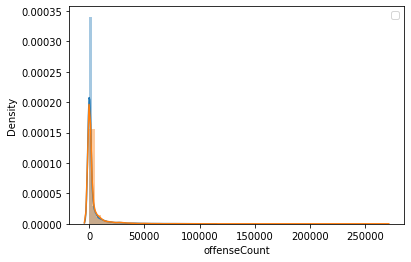

In [287]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(st_y1['offenseCount'])
sns.distplot(nst_y1['offenseCount'])
plt.legend()

## V) **Regression Analysis:**

In [288]:
georgia_reciddf = pd.read_csv('georgia_recidivism.csv')

In [289]:
georgia_reciddf.shape

(25835, 54)

In [290]:
georgia_reciddf.columns

Index(['id', 'gender', 'race', 'age_at_release', 'residence_puma',
       'gang_affiliated', 'supervision_risk_score_first',
       'supervision_level_first', 'education_level', 'dependents',
       'prison_offense', 'prison_years', 'prior_arrest_episodes_felony',
       'prior_arrest_episodes_misd', 'prior_arrest_episodes_violent',
       'prior_arrest_episodes_property', 'prior_arrest_episodes_drug',
       'prior_arrest_episodes', 'prior_arrest_episodes_1',
       'prior_arrest_episodes_2', 'prior_conviction_episodes',
       'prior_conviction_episodes_1', 'prior_conviction_episodes_2',
       'prior_conviction_episodes_3', 'prior_conviction_episodes_4',
       'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
       'prior_conviction_episodes_7', 'prior_revocations_parole',
       'prior_revocations_probation', 'condition_mh_sa', 'condition_cog_ed',
       'condition_other', 'violations', 'violations_instruction',
       'violations_failtoreport', 'violations_1', 'delin

In [291]:
georgia_reciddf.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [292]:
georgia_reciddf.nunique()

id 25835
gender 2
race 2
age_at_release 7
residence_puma 25
gang_affiliated 2
supervision_risk_score_first 10
supervision_level_first 3
education_level 3
dependents 4
prison_offense 5
prison_years 4
prior_arrest_episodes_felony 11
prior_arrest_episodes_misd 7
prior_arrest_episodes_violent 4
prior_arrest_episodes_property 6
prior_arrest_episodes_drug 6
prior_arrest_episodes 6
prior_arrest_episodes_1 2
prior_arrest_episodes_2 2
prior_conviction_episodes 4
prior_conviction_episodes_1 5
prior_conviction_episodes_2 2
prior_conviction_episodes_3 4
prior_conviction_episodes_4 3
prior_conviction_episodes_5 2
prior_conviction_episodes_6 2
prior_conviction_episodes_7 2
prior_revocations_parole 2
prior_revocations_probation 2
condition_mh_sa 2
condition_cog_ed 2
condition_other 2
violations 2
violations_instruction 2
violations_failtoreport 2
violations_1 2
delinquency_reports 5
program_attendances 11
program_unexcusedabsences 4
residence_changes 4
avg_days_per_drugtest 9833
drugtests_thc_positive 377
drugtests_cocaine_positive 249
drugtests_meth_positive 244
drugtests_other_positive 235
percent_days_employed 10997
jobs_per_year 3609
employment_exempt 2
recidivism_within_3years 2
recidivism_arrest_year1 2
recidivism_arrest_year2 2
recidivism_arrest_year3 2
training_sample 2
dtype: int64

In [293]:
georgia_regressiondf= georgia_reciddf[['race','age_at_release','gang_affiliated', 'prior_conviction_episodes',
       'prior_conviction_episodes_1', 'prior_conviction_episodes_2',
       'prior_conviction_episodes_3', 'prior_conviction_episodes_4',
       'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
       'prior_conviction_episodes_7','supervision_risk_score_first']]
georgia_regressiondf.shape

(25835, 12)

In [294]:
georgia_regressiondf.isna().sum(),georgia_regressiondf.isna().sum().sum()

(race                               0
 age_at_release                     0
 gang_affiliated                 3167
 prior_conviction_episodes          0
 prior_conviction_episodes_1        0
 prior_conviction_episodes_2        0
 prior_conviction_episodes_3        0
 prior_conviction_episodes_4        0
 prior_conviction_episodes_5        0
 prior_conviction_episodes_6        0
 prior_conviction_episodes_7        0
 supervision_risk_score_first     475
 dtype: int64,
 3642)

In [295]:
georgia_regressiondf.shape,

((25835, 12),)

In [296]:
georgia_regressiondf.shape[0] , georgia_regressiondf.drop_duplicates().shape[0]


(25835, 18994)

In [297]:
georgia_regressiondf.sample(50)

,race,age_at_release,gang_affiliated,prior_conviction_episodes,prior_conviction_episodes_1,prior_conviction_episodes_2,prior_conviction_episodes_3,prior_conviction_episodes_4,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,supervision_risk_score_first
21312,WHITE,23-27,False,0,1,False,0,1,True,False,False,6.0
8867,BLACK,28-32,False,0,4 or more,True,0,2 or more,False,True,False,6.0
24146,WHITE,23-27,False,2,2,False,0,2 or more,False,False,False,7.0
25134,WHITE,18-22,False,1,1,True,1,0,False,False,False,10.0
9706,BLACK,33-37,False,1,2,True,0,1,False,False,False,4.0
21035,WHITE,28-32,False,3 or more,0,True,2,1,False,False,False,9.0
22335,WHITE,48 or older,False,0,0,False,0,0,False,False,False,3.0
9053,BLACK,23-27,True,1,4 or more,False,1,1,False,False,True,7.0
4938,WHITE,48 or older,False,2,4 or more,False,1,2 or more,False,False,False,3.0
23620,BLACK,48 or older,False,0,1,False,2,0,False,False,False,2.0


In [298]:

pd.options.mode.chained_assignment = None  # default='warn'
mean_value = georgia_regressiondf['supervision_risk_score_first'].mean()

georgia_regressiondf['supervision_risk_score_first'].fillna(value=mean_value, inplace=True)

In [299]:
georgia_regressiondf = georgia_regressiondf.dropna()
georgia_regressiondf = georgia_regressiondf.drop_duplicates()

In [300]:
georgia_regressiondf.isna().sum() , georgia_regressiondf.isna().sum().sum()

(race                            0
 age_at_release                  0
 gang_affiliated                 0
 prior_conviction_episodes       0
 prior_conviction_episodes_1     0
 prior_conviction_episodes_2     0
 prior_conviction_episodes_3     0
 prior_conviction_episodes_4     0
 prior_conviction_episodes_5     0
 prior_conviction_episodes_6     0
 prior_conviction_episodes_7     0
 supervision_risk_score_first    0
 dtype: int64,
 0)

In [301]:
georgia_regressiondf.nunique()

race 2
age_at_release 7
gang_affiliated 2
prior_conviction_episodes 4
prior_conviction_episodes_1 5
prior_conviction_episodes_2 2
prior_conviction_episodes_3 4
prior_conviction_episodes_4 3
prior_conviction_episodes_5 2
prior_conviction_episodes_6 2
prior_conviction_episodes_7 2
supervision_risk_score_first 11
dtype: int64

In [302]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
categorical_cols = ["race",'gang_affiliated', 'prior_conviction_episodes_2'\
                        ,'prior_conviction_episodes_5'\
                        ,'prior_conviction_episodes_6','prior_conviction_episodes_7']

# apply le on categorical feature columns
georigia_regressiondf_le = georgia_regressiondf[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [303]:

georigia_regressiondf_le['supervision_risk_score_first']=georgia_regressiondf['supervision_risk_score_first']
georigia_regressiondf_le.columns

Index(['race', 'gang_affiliated', 'prior_conviction_episodes_2',
       'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
       'prior_conviction_episodes_7', 'supervision_risk_score_first'],
      dtype='object')

In [304]:
georigia_regressiondf_le['age_at_release']= georgia_regressiondf['age_at_release'].map({"18-22":20,  "23-27":25
                                            , "28-32":30,"33-37":35,"38-42":40,"43-47":45,"48 or older":50})

In [305]:
georigia_regressiondf_le['prior_conviction_episodes']=georgia_regressiondf['prior_conviction_episodes'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})

In [306]:
georigia_regressiondf_le['prior_conviction_episodes_1']=georgia_regressiondf['prior_conviction_episodes_1'].map({\
                                            "0":0,"1":1,"2":2,"3":3,"4 or more":4})

In [307]:
georigia_regressiondf_le['prior_conviction_episodes_3']=georgia_regressiondf['prior_conviction_episodes_3'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})

In [308]:
georigia_regressiondf_le['prior_conviction_episodes_4']=georgia_regressiondf['prior_conviction_episodes_4'].map({\
                                            "0":0,"1":1,"2 or more":2})

In [309]:
georigia_regressiondf_le.nunique()

race 2
gang_affiliated 2
prior_conviction_episodes_2 2
prior_conviction_episodes_5 2
prior_conviction_episodes_6 2
prior_conviction_episodes_7 2
supervision_risk_score_first 11
age_at_release 7
prior_conviction_episodes 4
prior_conviction_episodes_1 5
prior_conviction_episodes_3 4
prior_conviction_episodes_4 3
dtype: int64

In [310]:
georigia_regressiondf_le.sample(100)

,race,gang_affiliated,prior_conviction_episodes_2,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,supervision_risk_score_first,age_at_release,prior_conviction_episodes,prior_conviction_episodes_1,prior_conviction_episodes_3,prior_conviction_episodes_4
8941,0,0,1,1,0,0,6.000000,25,0,4,3,0
1208,0,0,0,0,0,1,8.000000,35,3,4,3,2
19813,1,1,0,1,0,0,5.000000,50,3,1,3,0
17756,1,0,0,0,0,0,8.000000,25,1,2,2,1
2973,0,0,0,0,0,1,9.000000,45,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5400,1,0,0,0,0,1,2.000000,50,3,4,0,0
17149,1,0,0,0,0,1,6.082216,35,0,2,0,2
5436,0,0,0,1,0,1,3.000000,35,3,4,0,2
4913,0,0,1,0,0,0,1.000000,50,1,1,0,0


<AxesSubplot:>

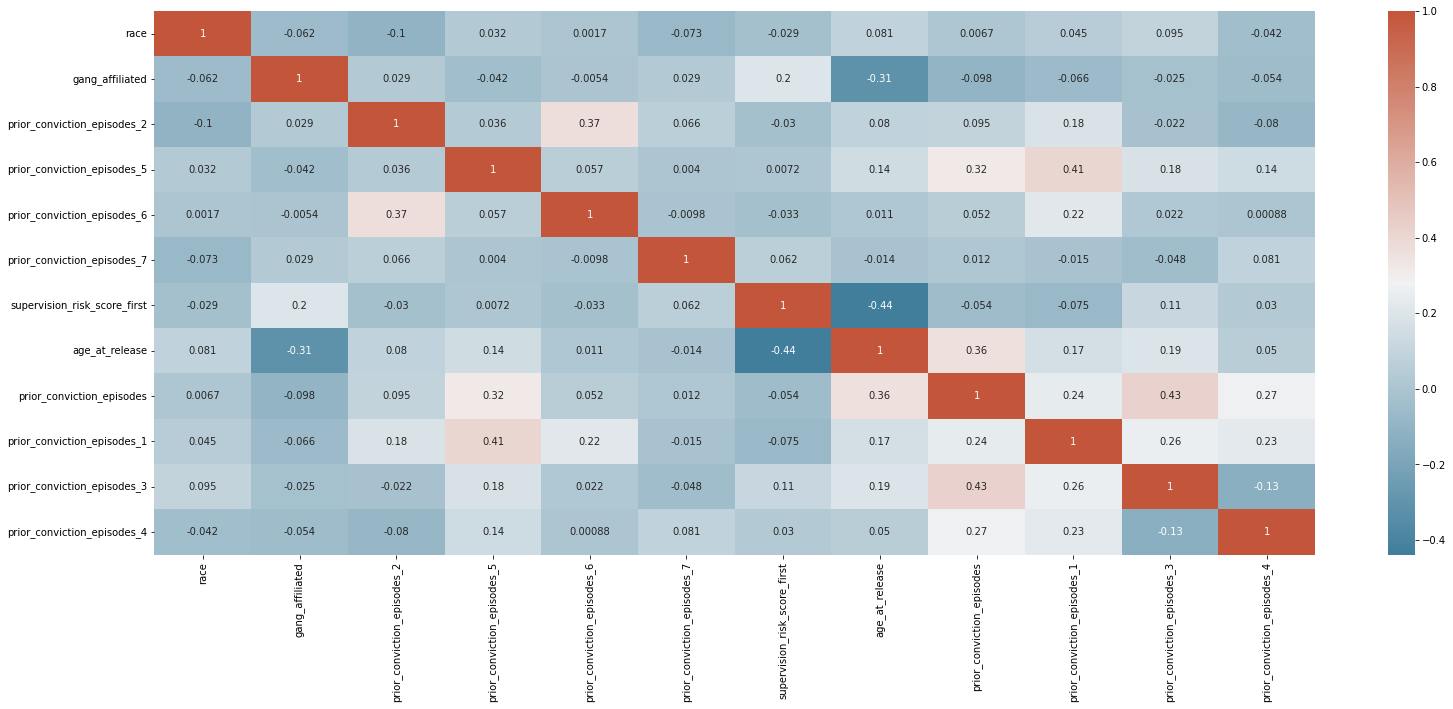

In [311]:
corr = georigia_regressiondf_le.corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(26, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap)

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [313]:
dropped_columns_model =['supervision_risk_score_first']
model_target = georigia_regressiondf_le['supervision_risk_score_first']
model_train = georigia_regressiondf_le.drop(dropped_columns_model,axis=1)
model_target.shape,model_train.shape

((16354,), (16354, 11))

In [314]:
Linear_model=LinearRegression()

In [315]:
model_train, model_test, model_tar_train, model_tar_test = train_test_split( model_train,model_target , test_size=0.2, random_state=42)
# x_train -> model_train    x_test-> model_test    y_train-> model_tar_train  y_test -> model_tar_test

In [316]:
x_mean = np.mean(model_train)
x_std = np.std(model_train)
epsilon = 1e-10
model_train = (model_train - x_mean)/(x_std + epsilon)
model_test = (model_test - x_mean)/(x_std + epsilon)

In [317]:
Linear_model.fit(model_train,model_tar_train)
model_test_predict = Linear_model.predict(model_test)

In [318]:

Linear_model.score(model_test ,  model_tar_test)

0.24885424889823649

In [319]:
r2_train = r2_score(model_tar_train,model_train_predict)
r2_test = r2_score(model_tar_test,model_test_predict)

print(r2_train,r2_test)

NameError: NameError: name 'model_train_predict' is not defined

In [236]:
X = georigia_regressiondf_le.drop(['supervision_risk_score_first'], axis = 1)
y = georigia_regressiondf_le['supervision_risk_score_first']
X_c = sm.add_constant(X)
lm2 = sm.OLS(y, X_c)
results = lm2.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: supervision_risk_score_first R-squared: 0.256 
 
 
 Model: OLS Adj. R-squared: 0.256 
 
 
 Method: Least Squares F-statistic: 511.8 
 
 
 Date: Tue, 10 Jan 2023 Prob (F-statistic): 0.00 
 
 
 Time: 17:02:56 Log-Likelihood: -35048. 
 
 
 No. Observations: 16354 AIC: 7.012e+04 
 
 
 Df Residuals: 16342 BIC: 7.021e+04 
 
 
 Df Model: 11 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 9.6299 0.075 128.625 0.000 9.483 9.777 
 
 
 race 0.0260 0.033 0.779 0.436 -0.039 0.091 
 
 
 gang_affiliated 0.3473 0.043 7.993 0.000 0.262 0.432 
 
 
 prior_conviction_episodes_2 0.2237 0.037 6.042 0.000 0.151 0.296 
 
 
 prior_conviction_episodes_5 0.3151 0.038 8.394 0.000 0.242 0.389 
 
 
 prior_conviction_episodes_6 -0.2187 0.055 -3.959 0.000 -0.327 -0.110 
 
 
 prior_conviction_episodes_7 0.3177 0.042 7.620 0.000 0.236 0.399 
 
 
 age_at_release -0.1222 0.002 -60.430 0.000 -0.126 -0.118 
 
 
 prior_conviction_episodes -0.0266 0.018 -1.444 0.149 -0.063 0.010 
 
 
 prior_conviction_episodes_1 -0.1701 0.013 -13.039 0.000 -0.196 -0.144 
 
 
 prior_conviction_episodes_3 0.4930 0.017 29.588 0.000 0.460 0.526 
 
 
 prior_conviction_episodes_4 0.3001 0.022 13.704 0.000 0.257 0.343 
 
 
 
 
 Omnibus: 28.164 Durbin-Watson: 1.953 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 31.554 
 
 
 Skew: -0.056 Prob(JB): 1.41e-07 
 
 
 Kurtosis: 3.184 Cond. No. 176. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

<AxesSubplot:>

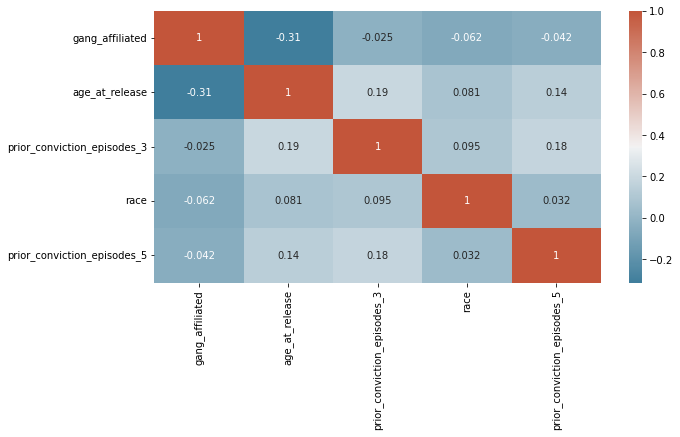

In [237]:
corr = georigia_regressiondf_le[['gang_affiliated', 'age_at_release', 'prior_conviction_episodes_3', 'race', 'prior_conviction_episodes_5']].corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(10, 5))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap)

## VI) **Bonus Task:**

In [72]:
georgia_classdf = pd.read_csv('georgia_recidivism.csv')

In [73]:
georgia_classdf.shape,georgia_classdf.columns

((25835, 54),
 Index(['id', 'gender', 'race', 'age_at_release', 'residence_puma',
        'gang_affiliated', 'supervision_risk_score_first',
        'supervision_level_first', 'education_level', 'dependents',
        'prison_offense', 'prison_years', 'prior_arrest_episodes_felony',
        'prior_arrest_episodes_misd', 'prior_arrest_episodes_violent',
        'prior_arrest_episodes_property', 'prior_arrest_episodes_drug',
        'prior_arrest_episodes', 'prior_arrest_episodes_1',
        'prior_arrest_episodes_2', 'prior_conviction_episodes',
        'prior_conviction_episodes_1', 'prior_conviction_episodes_2',
        'prior_conviction_episodes_3', 'prior_conviction_episodes_4',
        'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
        'prior_conviction_episodes_7', 'prior_revocations_parole',
        'prior_revocations_probation', 'condition_mh_sa', 'condition_cog_ed',
        'condition_other', 'violations', 'violations_instruction',
        'violations_failtore

In [74]:
pd.options.mode.chained_assignment = None  # default='warn'
mean_value = georgia_classdf['supervision_risk_score_first'].mean()

georgia_classdf['supervision_risk_score_first'].fillna(value=mean_value, inplace=True)

In [75]:

classdrop =["id",'recidivism_arrest_year1','recidivism_arrest_year2','recidivism_arrest_year3','gender']
georgia_classdf=georgia_classdf.drop(classdrop,axis=1)

In [76]:
georgia_classdf=georgia_classdf.dropna()

In [77]:
georgia_classdf.isna().sum().sum(),georgia_classdf.shape

(0, (14245, 49))

In [78]:
georgia_classdf.isna().sum()

race 0
age_at_release 0
residence_puma 0
gang_affiliated 0
supervision_risk_score_first 0
supervision_level_first 0
education_level 0
dependents 0
prison_offense 0
prison_years 0
prior_arrest_episodes_felony 0
prior_arrest_episodes_misd 0
prior_arrest_episodes_violent 0
prior_arrest_episodes_property 0
prior_arrest_episodes_drug 0
prior_arrest_episodes 0
prior_arrest_episodes_1 0
prior_arrest_episodes_2 0
prior_conviction_episodes 0
prior_conviction_episodes_1 0
prior_conviction_episodes_2 0
prior_conviction_episodes_3 0
prior_conviction_episodes_4 0
prior_conviction_episodes_5 0
prior_conviction_episodes_6 0
prior_conviction_episodes_7 0
prior_revocations_parole 0
prior_revocations_probation 0
condition_mh_sa 0
condition_cog_ed 0
condition_other 0
violations 0
violations_instruction 0
violations_failtoreport 0
violations_1 0
delinquency_reports 0
program_attendances 0
program_unexcusedabsences 0
residence_changes 0
avg_days_per_drugtest 0
drugtests_thc_positive 0
drugtests_cocaine_positive 0
drugtests_meth_positive 0
drugtests_other_positive 0
percent_days_employed 0
jobs_per_year 0
employment_exempt 0
recidivism_within_3years 0
training_sample 0
dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
categorical_cols = ["race",'gang_affiliated', 'prior_conviction_episodes_2'\
                        ,'prior_conviction_episodes_5'\
                        ,'prior_conviction_episodes_6','prior_conviction_episodes_7','prior_arrest_episodes_1'\
                    ,'prior_arrest_episodes_2','prior_revocations_parole','prior_revocations_probation'\
                    ,'condition_mh_sa','condition_cog_ed','condition_other','violations','violations_instruction','violations_failtoreport'\
                    ,'violations_1','employment_exempt','recidivism_within_3years']

# apply le on categorical feature columns
georgia_classdf_le = georgia_classdf[categorical_cols].apply(lambda col: le.fit_transform(col)) 

In [80]:
georgia_classdf_le['supervision_risk_score_first']=georgia_classdf['supervision_risk_score_first']

In [81]:
georgia_classdf_le.sample(10)

,race,gang_affiliated,prior_conviction_episodes_2,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,prior_arrest_episodes_1,prior_arrest_episodes_2,prior_revocations_parole,prior_revocations_probation,condition_mh_sa,condition_cog_ed,condition_other,violations,violations_instruction,violations_failtoreport,violations_1,employment_exempt,recidivism_within_3years,supervision_risk_score_first
19205,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3.0
7274,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,5.0
11879,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,3.0
3613,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0
4185,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,10.0
15171,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,9.0
854,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0
454,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,8.0
8930,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,4.0
16584,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,7.0


In [82]:
georgia_classdf.nunique()

race 2
age_at_release 7
residence_puma 25
gang_affiliated 2
supervision_risk_score_first 11
supervision_level_first 3
education_level 3
dependents 4
prison_offense 5
prison_years 4
prior_arrest_episodes_felony 11
prior_arrest_episodes_misd 7
prior_arrest_episodes_violent 4
prior_arrest_episodes_property 6
prior_arrest_episodes_drug 6
prior_arrest_episodes 6
prior_arrest_episodes_1 2
prior_arrest_episodes_2 2
prior_conviction_episodes 4
prior_conviction_episodes_1 5
prior_conviction_episodes_2 2
prior_conviction_episodes_3 4
prior_conviction_episodes_4 3
prior_conviction_episodes_5 2
prior_conviction_episodes_6 2
prior_conviction_episodes_7 2
prior_revocations_parole 2
prior_revocations_probation 2
condition_mh_sa 2
condition_cog_ed 2
condition_other 2
violations 2
violations_instruction 2
violations_failtoreport 2
violations_1 2
delinquency_reports 5
program_attendances 11
program_unexcusedabsences 4
residence_changes 4
avg_days_per_drugtest 7913
drugtests_thc_positive 298
drugtests_cocaine_positive 184
drugtests_meth_positive 191
drugtests_other_positive 161
percent_days_employed 7019
jobs_per_year 3044
employment_exempt 2
recidivism_within_3years 2
training_sample 2
dtype: int64

In [83]:
georgia_classdf_le['age_at_release']= georgia_classdf['age_at_release'].map({"18-22":20,  "23-27":25
                                            , "28-32":30,"33-37":35,"38-42":40,"43-47":45,"48 or older":50})

georgia_classdf_le['prior_conviction_episodes']=georgia_classdf['prior_conviction_episodes'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})

georgia_classdf_le['prior_conviction_episodes_1']=georgia_classdf['prior_conviction_episodes_1'].map({\
                                            "0":0,"1":1,"2":2,"3":3,"4 or more":4})

georgia_classdf_le['prior_conviction_episodes_3']=georgia_classdf['prior_conviction_episodes_3'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})

georgia_classdf_le['prior_conviction_episodes_4']=georgia_classdf['prior_conviction_episodes_4'].map({\
                                            "0":0,"1":1,"2 or more":2})
georgia_classdf_le['supervision_level_first']= georgia_classdf['supervision_level_first'].map({"Standard":0, "High":1
                                            , "Specialized":2})
georgia_classdf_le['education_level']= georgia_classdf['education_level'].map({"Less than HS diploma":0, "High School Diploma":1
                                            , "At least some college":2})
georgia_classdf_le['dependents']=georgia_classdf['dependents'].map({"0":0,"1":1,"2":2,"3 or more":3})
georgia_classdf_le['prison_offense']=georgia_classdf['prison_offense'].map({\
                                            "Violent/Sex":0,"Drug":1,"Other":2,"Violent/Non-Sex":3,"Property":4})
georgia_classdf_le['prison_years']=georgia_classdf['prison_years'].map({"Less than 1 year":0,"1-2 years":1,"Greater than 2 to 3 years":2,"More than 3 years":3})

georgia_classdf_le['prior_arrest_episodes_felony']= georgia_classdf['prior_arrest_episodes_felony'].map({"1":1,"2":2
                                            , "3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10 or more":10})


georgia_classdf_le['prior_arrest_episodes_misd']= georgia_classdf['prior_arrest_episodes_misd'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5":5,"6 or more":6})
georgia_classdf_le['prior_arrest_episodes_violent']=georgia_classdf['prior_arrest_episodes_violent'].map({"0":0,"1":1,"2":2,"3 or more":3})



georgia_classdf_le['prior_arrest_episodes_property']= georgia_classdf['prior_arrest_episodes_property'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5 or more":5})
georgia_classdf_le['prior_arrest_episodes_drug']= georgia_classdf['prior_arrest_episodes_drug'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5 or more":5})
georgia_classdf_le['prior_arrest_episodes']= georgia_classdf['prior_arrest_episodes'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5 or more":5})

georgia_classdf_le['delinquency_reports']=georgia_classdf['delinquency_reports'].map({\
                                            "0":0,"1":1,"2":2,"3":3,"4 or more":4})

georgia_classdf_le['prior_arrest_episodes_felony']= georgia_classdf['prior_arrest_episodes_felony'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10 or more":10})
georgia_classdf_le['program_unexcusedabsences']=georgia_classdf['program_unexcusedabsences'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})
georgia_classdf_le['residence_changes']=georgia_classdf['residence_changes'].map({\
                                            "0":0,"1":1,"2":2,"3 or more":3})
                                         
georgia_classdf_le['program_attendances']= georgia_classdf['program_attendances'].map({"0":0,"1":1,"2":2
                                            , "3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10 or more":10})

In [84]:
georgia_classdf_le['drugtests_cocaine_positive']=georgia_classdf['drugtests_cocaine_positive']
georgia_classdf_le['training_sample']=georgia_classdf['training_sample']
georgia_classdf_le['drugtests_thc_positive']=georgia_classdf['drugtests_thc_positive']
georgia_classdf_le['drugtests_meth_positive']=georgia_classdf['drugtests_meth_positive']
georgia_classdf_le['avg_days_per_drugtest']=georgia_classdf['avg_days_per_drugtest']
georgia_classdf_le['percent_days_employed']=georgia_classdf['percent_days_employed']

georgia_classdf_le['residence_puma']=georgia_classdf['residence_puma']
georgia_classdf_le['jobs_per_year']=georgia_classdf['jobs_per_year']
georgia_classdf_le['drugtests_other_positive']=georgia_classdf['drugtests_other_positive']

In [85]:
georgia_classdf.sample(1000)

,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,prison_offense,prison_years,...,avg_days_per_drugtest,drugtests_thc_positive,drugtests_cocaine_positive,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,training_sample
3884,WHITE,48 or older,4,False,2.0,Standard,At least some college,3 or more,Drug,Less than 1 year,...,113.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,False,True,1
14412,WHITE,48 or older,4,False,4.0,Standard,Less than HS diploma,1,Violent/Non-Sex,Greater than 2 to 3 years,...,38.581395,0.000000,0.000000,0.0,0.0,0.746233,0.220163,True,False,1
11942,BLACK,18-22,8,False,9.0,Specialized,Less than HS diploma,0,Other,More than 3 years,...,143.500000,0.000000,0.000000,0.0,0.0,0.644599,0.424216,False,False,0
5800,BLACK,28-32,1,False,9.0,Standard,Less than HS diploma,3 or more,Other,Less than 1 year,...,27.200000,0.000000,0.000000,0.0,0.0,0.963235,1.000000,False,True,1
14313,WHITE,38-42,3,False,5.0,Specialized,At least some college,0,Violent/Sex,1-2 years,...,38.461538,0.000000,0.000000,0.0,0.0,1.000000,1.461000,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24749,BLACK,23-27,25,False,5.0,Standard,Less than HS diploma,0,Other,Less than 1 year,...,29.800000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,True,False,1
10491,BLACK,48 or older,16,False,1.0,Standard,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,...,205.666667,0.000000,0.000000,0.0,0.0,0.093193,0.591977,False,True,1
7415,BLACK,23-27,19,False,7.0,Standard,Less than HS diploma,1,Property,More than 3 years,...,110.076923,0.000000,0.076923,0.0,0.0,0.000000,0.000000,False,False,1
20225,BLACK,43-47,14,False,2.0,Standard,Less than HS diploma,1,Other,Less than 1 year,...,115.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,False,True,1


In [86]:
georgia_classdf_le.sample(100)

,race,gang_affiliated,prior_conviction_episodes_2,prior_conviction_episodes_5,prior_conviction_episodes_6,prior_conviction_episodes_7,prior_arrest_episodes_1,prior_arrest_episodes_2,prior_revocations_parole,prior_revocations_probation,...,program_attendances,drugtests_cocaine_positive,training_sample,drugtests_thc_positive,drugtests_meth_positive,avg_days_per_drugtest,percent_days_employed,residence_puma,jobs_per_year,drugtests_other_positive
17169,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0.150000,0.000000,43.750000,0.000000,8,0.000000,0.15
17296,1,0,0,0,0,0,1,0,0,0,...,0,0.000000,0,0.000000,0.000000,32.272727,1.000000,11,2.000000,0.00
13845,1,0,1,0,0,0,0,0,0,0,...,9,0.000000,1,0.000000,0.000000,19.875000,0.000000,8,0.000000,0.00
20877,1,0,0,0,0,0,0,0,0,0,...,10,0.000000,1,0.200000,0.000000,83.200000,0.411058,8,1.756010,0.00
18256,0,0,1,0,0,0,0,0,0,0,...,6,0.074074,0,0.000000,0.000000,25.481481,1.000000,8,1.592660,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,0,0,0,0,0,0,0,0,0,1,...,10,0.000000,0,0.029412,0.000000,8.294118,0.085106,24,2.000000,0.00
10932,0,0,1,0,0,0,0,0,0,0,...,8,0.000000,1,0.100000,0.000000,16.675000,0.562219,14,1.095202,0.00
10232,1,0,0,0,0,0,0,0,0,0,...,0,0.000000,1,0.040000,0.000000,56.960000,0.922753,3,0.769487,0.00
5419,1,0,0,0,0,0,0,0,0,0,...,2,0.000000,0,0.000000,0.000000,49.208333,0.950042,8,0.309272,0.00


In [87]:
georgia_classdf_le.columns

Index(['race', 'gang_affiliated', 'prior_conviction_episodes_2',
       'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
       'prior_conviction_episodes_7', 'prior_arrest_episodes_1',
       'prior_arrest_episodes_2', 'prior_revocations_parole',
       'prior_revocations_probation', 'condition_mh_sa', 'condition_cog_ed',
       'condition_other', 'violations', 'violations_instruction',
       'violations_failtoreport', 'violations_1', 'employment_exempt',
       'recidivism_within_3years', 'supervision_risk_score_first',
       'age_at_release', 'prior_conviction_episodes',
       'prior_conviction_episodes_1', 'prior_conviction_episodes_3',
       'prior_conviction_episodes_4', 'supervision_level_first',
       'education_level', 'dependents', 'prison_offense', 'prison_years',
       'prior_arrest_episodes_felony', 'prior_arrest_episodes_misd',
       'prior_arrest_episodes_violent', 'prior_arrest_episodes_property',
       'prior_arrest_episodes_drug', 'prior_arrest_ep

In [88]:
georgia_classdf_le.isna().sum()




race 0
gang_affiliated 0
prior_conviction_episodes_2 0
prior_conviction_episodes_5 0
prior_conviction_episodes_6 0
prior_conviction_episodes_7 0
prior_arrest_episodes_1 0
prior_arrest_episodes_2 0
prior_revocations_parole 0
prior_revocations_probation 0
condition_mh_sa 0
condition_cog_ed 0
condition_other 0
violations 0
violations_instruction 0
violations_failtoreport 0
violations_1 0
employment_exempt 0
recidivism_within_3years 0
supervision_risk_score_first 0
age_at_release 0
prior_conviction_episodes 0
prior_conviction_episodes_1 0
prior_conviction_episodes_3 0
prior_conviction_episodes_4 0
supervision_level_first 0
education_level 0
dependents 0
prison_offense 0
prison_years 0
prior_arrest_episodes_felony 0
prior_arrest_episodes_misd 0
prior_arrest_episodes_violent 0
prior_arrest_episodes_property 0
prior_arrest_episodes_drug 0
prior_arrest_episodes 0
delinquency_reports 0
program_unexcusedabsences 0
residence_changes 0
program_attendances 0
drugtests_cocaine_positive 0
training_sample 0
drugtests_thc_positive 0
drugtests_meth_positive 0
avg_days_per_drugtest 0
percent_days_employed 0
residence_puma 0
jobs_per_year 0
drugtests_other_positive 0
dtype: int64

In [89]:
georgia_classdf_le.columns

Index(['race', 'gang_affiliated', 'prior_conviction_episodes_2',
       'prior_conviction_episodes_5', 'prior_conviction_episodes_6',
       'prior_conviction_episodes_7', 'prior_arrest_episodes_1',
       'prior_arrest_episodes_2', 'prior_revocations_parole',
       'prior_revocations_probation', 'condition_mh_sa', 'condition_cog_ed',
       'condition_other', 'violations', 'violations_instruction',
       'violations_failtoreport', 'violations_1', 'employment_exempt',
       'recidivism_within_3years', 'supervision_risk_score_first',
       'age_at_release', 'prior_conviction_episodes',
       'prior_conviction_episodes_1', 'prior_conviction_episodes_3',
       'prior_conviction_episodes_4', 'supervision_level_first',
       'education_level', 'dependents', 'prison_offense', 'prison_years',
       'prior_arrest_episodes_felony', 'prior_arrest_episodes_misd',
       'prior_arrest_episodes_violent', 'prior_arrest_episodes_property',
       'prior_arrest_episodes_drug', 'prior_arrest_ep

In [90]:
corr = georgia_classdf_le.corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(200, 200))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
sns.heatmap(corr, annot=True, cmap=cmap )
plt.savefig('correlation.png')

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
Logistic_model = LogisticRegression()

In [161]:

dropped_columns_model2 =['recidivism_within_3years']
model2_target = georgia_classdf_le['recidivism_within_3years']
model2_train = georgia_classdf_le.drop(dropped_columns_model2,axis=1)
model2_target.shape,model2_train.shape


((14245,), (14245, 48))

In [162]:
model_train, model_test, model_tar_train, model_tar_test = train_test_split( model2_train,model2_target , test_size=0.2, random_state=42)
# x_train -> model_train    x_test-> model_test    y_train-> model_tar_train  y_test -> model_tar_test

In [163]:
x_mean = np.mean(model_train)
x_std = np.std(model_train)
epsilon = 1e-10
model_train = (model_train - x_mean)/(x_std + epsilon)
model_test = (model_test - x_mean)/(x_std + epsilon)

In [164]:
Logistic_model.fit(model_train,model_tar_train)
model_test_predict = Logistic_model.predict(model_test)

In [165]:
Logistic_model.score( model_test,model_tar_test  )

0.7244647244647244

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [168]:

dropped_columns_model2 =['recidivism_within_3years']
model3_target = georgia_classdf_le['recidivism_within_3years']
model3_train = georgia_classdf_le.drop(dropped_columns_model2,axis=1)
model3_target.shape,model3_train.shape

((14245,), (14245, 48))

In [169]:
model_train, model_test, model_tar_train, model_tar_test = train_test_split( model3_train,model3_target , test_size=0.2,random_state =7)
# x_train -> model_train    x_test-> model_test    y_train-> model_tar_train  y_test -> model_tar_test

In [170]:
x_mean = np.mean(model_train)
x_std = np.std(model_train)
epsilon = 1e-10
model_train = (model_train - x_mean)/(x_std + epsilon)
model_test = (model_test - x_mean)/(x_std + epsilon)

In [171]:
clf = DecisionTreeClassifier()
clf.fit(model_train, model_tar_train)

DecisionTreeClassifier()

In [172]:
target_pred=clf.predict(model_test)

accuracy_score(model_tar_test, target_pred)

0.6328536328536328

In [173]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [174]:
dropped_columns_model4 =['recidivism_within_3years']
model4_target = georgia_classdf_le['recidivism_within_3years']
model4_train = georgia_classdf_le.drop(dropped_columns_model2,axis=1)
model4_target.shape,model4_train.shape

((14245,), (14245, 48))

In [175]:
model_train, model_test, model_tar_train, model_tar_test = train_test_split( model4_train,model4_target , test_size=0.2, random_state=42)
# x_train -> model_train    x_test-> model_test    y_train-> model_tar_train  y_test -> model_tar_test

In [176]:
x_mean = np.mean(model_train)
x_std = np.std(model_train)
epsilon = 1e-10
model_train = (model_train - x_mean)/(x_std + epsilon)
model_test = (model_test - x_mean)/(x_std + epsilon)

In [177]:
rfc.fit(model_train, model_tar_train)

RandomForestClassifier()

In [178]:
target_pred=rfc.predict(model_test)

In [179]:
accuracy_score(model_tar_test, target_pred)

0.726921726921727

In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [181]:
x_mean = np.mean(model_train)
x_std = np.std(model_train)
epsilon = 1e-10
model_train = (model_train - x_mean)/(x_std + epsilon)
model_test = (model_test - x_mean)/(x_std + epsilon)

In [182]:
knn.fit(model_train ,model_tar_train)
ypred = knn.predict(model_test)
from sklearn.metrics import accuracy_score
accuracy_score(ypred,model_tar_test)

0.6486486486486487